# Dissociation of task engagement and arousal effects in auditory cortex and midbrain

**Figures**  
1. Behavior and pupil
2. Example A1 unit PSTH before and after taking only matched pupil + scatter plot with marginal distributions of MIbeh-only and MIbeh-unique.
4. MIbeh-unique vs. MIpup-unique scatter plot for A1 + IC
5. Stacked histogram of R20, R2beh-unique, R2pup-unique and R2common for each cell (A1 + IC). sort by total 
6. Pre-post effects. Example cell showing apparent pre-post difference. Then show effect of incorporating pupil that reduces or removes pre-post effect. MIpost vs. MIpost-unique for 
7. Auditoryness vs. stateness: R20 vs. other R’s to see what it looks like. Either say there’s no correlation (R20 does not predict state effects) or there is.

MIbeh = behavior only (no pupil, ie, pupil shuffled), or R2beh for variance explained  
MIbeh-unique = behavior unique (‘minus pupil’)  
MIpup-unique = pupil unique (‘minus behavior’)  
R2common = ambiguous pupil or behavior   
R20 = performance of null model (pup and beh shuffled)  



In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as sci
import statsmodels.formula.api as smf
import matplotlib.collections as clt
import re
import pylab as pl
from nems_lbhb.pupil_behavior_scripts.mod_per_state import get_model_results_per_state_model
from nems_lbhb.pupil_behavior_scripts.mod_per_state import aud_vs_state
from nems_lbhb.pupil_behavior_scripts.mod_per_state import hlf_analysis
from nems_lbhb.stateplots import model_per_time_wrapper, beta_comp

%matplotlib inline
os.getcwd()

color_ba = '#82418B' #dark purple 
color_p = '#2E7E3E' #dark green
color_bpas = '#D199C4' #light purple

savefigs = True
figs_dir = '/Users/daniela/Documents/2018/AC_IC_project_2018/Task_engagement_pupil_paper/figures'
path=os.getcwd()

[nems.configs.defaults INFO] Saving log messages to /tmp/nems/NEMS 2019-07-18 160200.log


## Functions

In [4]:
# def find_sig_cellids(df, state_chan_val='active', condition='pb', sign_type = 'beh'):
#     '''it takes a Pandas df as an argument and returns a Pandas series with cellids that are significantly modulated 
#     by behavior if sign_type 'beh' according to P
#     If sign_type = 'state', then it pulls out untis significantly modulated by either state, pupil or behavior'''
    
#     if condition=='pb' and sign_type == 'beh':
#         df_state = df[df['state_chan']==state_chan_val]
        
#         # Pivot the new df such that you only have r or r_se as data and state_sig as columns
#         df_r = df_state.pivot(index='cellid', columns='state_sig', values='r')
#         df_rse = df_state.pivot(index='cellid', columns='state_sig', values='r_se')

#         df_r['r_diff'] = df_r['st.pup0.beh']-df_r['st.pup0.beh0']
#         df_rse['r_sum'] = df_rse['st.pup0.beh']+df_rse['st.pup0.beh0']
        
#     elif condition=='pb' and sign_type == 'behu':
#         df_state = df[df['state_chan']==state_chan_val]
        
#         # Pivot the new df such that you only have r or r_se as data and state_sig as columns
#         df_r = df_state.pivot(index='cellid', columns='state_sig', values='r')
#         df_rse = df_state.pivot(index='cellid', columns='state_sig', values='r_se')

#         df_r['r_diff'] = df_r['st.pup.beh']-df_r['st.pup.beh0']
#         df_rse['r_sum'] = df_rse['st.pup.beh']+df_rse['st.pup.beh0']
        
#     elif condition=='pb' and sign_type == 'pupu':
#         df_state = df[df['state_chan']==state_chan_val]
        
#         # Pivot the new df such that you only have r or r_se as data and state_sig as columns
#         df_r = df_state.pivot(index='cellid', columns='state_sig', values='r')
#         df_rse = df_state.pivot(index='cellid', columns='state_sig', values='r_se')

#         df_r['r_diff'] = df_r['st.pup.beh']-df_r['st.pup0.beh']
#         df_rse['r_sum'] = df_rse['st.pup.beh']+df_rse['st.pup0.beh']
        
#     elif condition=='pb' and sign_type == 'state':
#         df_state = df[df['state_chan']==state_chan_val]
        
#         # Pivot the new df such that you only have r or r_se as data and state_sig as columns
#         df_r = df_state.pivot(index='cellid', columns='state_sig', values='r')
#         df_rse = df_state.pivot(index='cellid', columns='state_sig', values='r_se')

#         df_r['r_diff'] = df_r['st.pup.beh']-df_r['st.pup0.beh0']
#         df_rse['r_sum'] = df_rse['st.pup.beh']+df_rse['st.pup0.beh0']
        
#     elif condition=='pp' and sign_type == 'beh':
#         df_state = df[df['state_chan_alt']==state_chan_val]
        
#         # Pivot the new df such that you only have r or r_se as data and state_sig as columns
#         df_r = df_state.pivot(index='cellid', columns='state_sig', values='r')
#         df_rse = df_state.pivot(index='cellid', columns='state_sig', values='r_se')
        
#         df_r['r_diff'] = df_r['st.pup0.pas']-df_r['st.pup0.pas0']
#         df_rse['r_sum'] = df_rse['st.pup0.pas']+df_rse['st.pup0.pas0']
        
        
#     elif condition=='pp' and sign_type == 'state':
#         df_state = df[df['state_chan_alt']==state_chan_val]
        
#         # Pivot the new df such that you only have r or r_se as data and state_sig as columns
#         df_r = df_state.pivot(index='cellid', columns='state_sig', values='r')
#         df_rse = df_state.pivot(index='cellid', columns='state_sig', values='r_se')
        
#         df_r['r_diff'] = df_r['st.pup0.pas']-df_r['st.pup0.pas0']
#         df_rse['r_sum'] = df_rse['st.pup0.pas']+df_rse['st.pup0.pas0']
        
        
#     elif condition=='pf' and sign_type == 'beh':
#         df_state = df[df['state_chan_alt']==state_chan_val]
        
#         # Pivot the new df such that you only have r or r_se as data and state_sig as columns
#         df_r = df_state.pivot(index='cellid', columns='state_sig', values='r')
#         df_rse = df_state.pivot(index='cellid', columns='state_sig', values='r_se')
        
#         df_r['r_diff'] = df_r['st.pup0.fil']-df_r['st.pup0.fil0']
#         df_rse['r_sum'] = df_rse['st.pup0.fil']+df_rse['st.pup0.fil0']
        
        
#     elif condition=='fil' and sign_type == 'state':
#         df_state = df[df['state_chan']==state_chan_val]
        
#         # Pivot the new df such that you only have r or r_se as data and state_sig as columns
#         df_r = df_state.pivot(index='cellid', columns='state_sig', values='r')
#         df_rse = df_state.pivot(index='cellid', columns='state_sig', values='r_se')

#         df_r['r_diff'] = df_r['st.fil']-df_r['st.fil0']
#         df_rse['r_sum'] = df_rse['st.fil']+df_rse['st.fil0']
        
        
#     cellid_sig = df_r[df_r['r_diff']>df_rse['r_sum']].index
    
#     return cellid_sig

In [5]:
def find_sig_cellids(df, state_chan_val='active', condition='pb', sign_type = 'beh'):
    '''it takes a Pandas df as an argument and returns a Pandas series with cellids that are significantly modulated 
    by behavior if sign_type 'beh' according to P
    If sign_type = 'state', then it pulls out untis significantly modulated by either state, pupil or behavior'''
    
    if condition=='pb' and sign_type == 'beh':
        df_state = df[df['state_chan']==state_chan_val]
        
        # Pivot the new df such that you only have r or r_se as data and state_sig as columns
        df_r = df_state.pivot(index='cellid', columns='state_sig', values='r')
        df_rse = df_state.pivot(index='cellid', columns='state_sig', values='r_se')

        df_r['r_diff'] = df_r['st.pup0.beh']-df_r['st.pup0.beh0']
        df_rse['r_sum'] = df_rse['st.pup0.beh']+df_rse['st.pup0.beh0']
        
    elif condition=='pb' and sign_type == 'ubeh':
        df_state = df[df['state_chan']==state_chan_val]
        
        # Pivot the new df such that you only have r or r_se as data and state_sig as columns
        df_r = df_state.pivot(index='cellid', columns='state_sig', values='r')
        df_rse = df_state.pivot(index='cellid', columns='state_sig', values='r_se')

        df_r['r_diff'] = df_r['st.pup.beh']-df_r['st.pup.beh0']
        df_rse['r_sum'] = df_rse['st.pup.beh']+df_rse['st.pup.beh0']
        
    elif condition=='pb' and sign_type == 'upup':
        df_state = df[df['state_chan']==state_chan_val]
        
        # Pivot the new df such that you only have r or r_se as data and state_sig as columns
        df_r = df_state.pivot(index='cellid', columns='state_sig', values='r')
        df_rse = df_state.pivot(index='cellid', columns='state_sig', values='r_se')

        df_r['r_diff'] = df_r['st.pup.beh']-df_r['st.pup0.beh']
        df_rse['r_sum'] = df_rse['st.pup.beh']+df_rse['st.pup0.beh']
        
    elif condition=='pb' and sign_type == 'state':
        df_state = df[df['state_chan']==state_chan_val]
        
        # Pivot the new df such that you only have r or r_se as data and state_sig as columns
        df_r = df_state.pivot(index='cellid', columns='state_sig', values='r')
        df_rse = df_state.pivot(index='cellid', columns='state_sig', values='r_se')

        df_r['r_diff'] = df_r['st.pup.beh']-df_r['st.pup0.beh0']
        df_rse['r_sum'] = df_rse['st.pup.beh']+df_rse['st.pup0.beh0']
        
    elif condition=='pp' and sign_type == 'beh':
        df_state = df[df['state_chan_alt']==state_chan_val]
        
        # Pivot the new df such that you only have r or r_se as data and state_sig as columns
        df_r = df_state.pivot(index='cellid', columns='state_sig', values='r')
        df_rse = df_state.pivot(index='cellid', columns='state_sig', values='r_se')
        
        df_r['r_diff'] = df_r['st.pup0.pas']-df_r['st.pup0.pas0']
        df_rse['r_sum'] = df_rse['st.pup0.pas']+df_rse['st.pup0.pas0']
        
        
    elif condition=='pp' and sign_type == 'state':
        df_state = df[df['state_chan_alt']==state_chan_val]
        
        # Pivot the new df such that you only have r or r_se as data and state_sig as columns
        df_r = df_state.pivot(index='cellid', columns='state_sig', values='r')
        df_rse = df_state.pivot(index='cellid', columns='state_sig', values='r_se')
        
        df_r['r_diff'] = df_r['st.pup0.pas']-df_r['st.pup0.pas0']
        df_rse['r_sum'] = df_rse['st.pup0.pas']+df_rse['st.pup0.pas0']
        
        
    elif condition=='pf' and sign_type == 'beh':
        df_state = df[df['state_chan_alt']==state_chan_val]
        
        # Pivot the new df such that you only have r or r_se as data and state_sig as columns
        df_r = df_state.pivot(index='cellid', columns='state_sig', values='r')
        df_rse = df_state.pivot(index='cellid', columns='state_sig', values='r_se')
        
        df_r['r_diff'] = df_r['st.pup0.fil']-df_r['st.pup0.fil0']
        df_rse['r_sum'] = df_rse['st.pup0.fil']+df_rse['st.pup0.fil0']
        
        
    elif condition=='fil' and sign_type == 'state':
        df_state = df[df['state_chan']==state_chan_val]
        
        # Pivot the new df such that you only have r or r_se as data and state_sig as columns
        df_r = df_state.pivot(index='cellid', columns='state_sig', values='r')
        df_rse = df_state.pivot(index='cellid', columns='state_sig', values='r_se')

        df_r['r_diff'] = df_r['st.fil']-df_r['st.fil0']
        df_rse['r_sum'] = df_rse['st.fil']+df_rse['st.fil0']
        
        
    cellid_sig = df_r[df_r['r_diff']>df_rse['r_sum']].index
    
    return cellid_sig

In [6]:
def find_SUs(df, isolation=90.0):
    '''This function takes original df and extracts rows where isolation >= isolation. "Isolation" has to be a float'''
    df_iso = df[df['isolation']>=isolation]
    return df_iso

In [7]:
def one_state(df, col_idx='MI', state='only', state_chan_val='active', state_sig1='st.pup0.beh', state_sig2='st.pup0.beh0',
             condition='pb', absolute=None):
    '''it takes a dataframe and a column_index and it returns two dfs with the difference between the values of 
    the column index one for all cells one for significant cells. e.g. for MI, MIbeh = MIpup0beh-MIpup0beh0.
    if absolute is set to 1, then there will be another column with col_idx absolute value'''
    
    if condition=='pb':
        df_state = df[df['state_chan']==state_chan_val]
    
        df_ss1 = df_state[df_state['state_sig']==state_sig1]
        df_ss2 = df_state[df_state['state_sig']==state_sig2]
    
        # pivot model 1 and 2 to have the column_index for each state_chan
        df_ss1_col_idx = df_ss1.pivot(index='cellid', columns='state_chan', values=col_idx)
        df_ss2_col_idx = df_ss2.pivot(index='cellid', columns='state_chan', values=col_idx)
    
    elif condition=='pp' or condition=='pf' or condition=='fil':
        df_state = df[df['state_chan_alt']==state_chan_val]
    
        df_ss1 = df_state[df_state['state_sig']==state_sig1]
        df_ss2 = df_state[df_state['state_sig']==state_sig2]
    
        # pivot model 1 and 2 to have the column_index for each state_chan
        df_ss1_col_idx = df_ss1.pivot(index='cellid', columns='state_chan_alt', values=col_idx)
        df_ss2_col_idx = df_ss2.pivot(index='cellid', columns='state_chan_alt', values=col_idx)
        
    
    #change name of column to prepare for merging
    df_ss2_col_idx = df_ss2_col_idx.rename(index=str, columns={state_chan_val:state_chan_val+'0'})
    
    #reset index to get rid of multindexing in model 1 and 2
    df_ss1_col_idx = df_ss1_col_idx.reset_index()
    df_ss2_col_idx = df_ss2_col_idx.reset_index()
    
    # join dataframes
    df_col_idx_state = pd.merge(df_ss1_col_idx, df_ss2_col_idx, how='left', on='cellid')
    
    # add column with difference between state_chan and state_chan0
    df_col_idx_state[col_idx+'_'+state_chan_val+'_'+state] = df_col_idx_state[state_chan_val]-df_col_idx_state[state_chan_val+'0']
    
    # set the index back to cellid to apply the loc method and get the significant cells
    df_col_idx_state = df_col_idx_state.set_index('cellid')
    
    # if absolute is set to 1, then there will be another column with col_idx absolute value
    if absolute==1:
        df_col_idx_state[col_idx+'_'+state_chan_val+'_'+state+'_abs'] = abs(df_col_idx_state[col_idx+'_'+state_chan_val+'_'+state])
    
    #df_col_idx_state = df_col_idx_state[col_idx+'_'+state_chan_val+'_'+state]
    
    return df_col_idx_state

In [8]:
def plot_hist(df, color, brain_region, column, bins = None, df_sig = None, color_sig=None, bins_sig=None):
    '''plot_hist function takes a data frame and plots the histogram distribution of a column and the significant
    cells for that colums in another color, if set. Than it save the figure with appropriate name'''
    
    sns.set(style="white")
    df_median = df[column].median()
    df_sig_median = df_sig[column].median()
    
    print(df_median, df_sig_median)
    
    dist_df = sns.distplot(df[column], hist_kws = {'alpha':1, 'color': color}, kde=False, bins=bins)
    dist_df_sig = sns.distplot(df_sig[column], hist_kws = {'alpha':1, 'color': color_sig}, kde=False, bins=bins_sig)
    
    plt.axvline(0, linestyle='--', linewidth=0.5, color='k')
    plt.xlim(-1, 1)
    
    dist_df.text(-0.9,18, "median = {:0.2f}".format(df_median), horizontalalignment='left', 
                         size='medium', color='k')
    dist_df.text(-0.9,16, "median sig = {:0.2f}".format(df_sig_median), horizontalalignment='left', size='medium', color='k')

    plt.xlabel(brain_region+'_'+column)
    plt.savefig(brain_region+'_'+column+'.pdf')

In [9]:
def scatter_states(df1, df2, column1, column2, color, brain_region, df1_sig=None, df2_sig=None, color_sig=None):
    '''This function takes four data frames, two of which are with significant cells, columns for each data frame 
    (eg 'MI_active_only' or 'R2_active_unique') and plots the scatter plot between those and the significant units
    on top'''
    
    fig, ax = plt.subplots()
    
    ax.scatter(df1[column1], df2[column2], color='lightgrey', edgecolors='white')

    if df2_sig is not None:
        ax.scatter(df1_sig[column1], df2_sig[column2], color=color_sig, edgecolors='white')
    
    ax.set_xlabel(brain_region+'_'+column1)
    ax.set_ylabel(brain_region+'_'+column2)
    ax.set_aspect('equal')
    
    # set the limits
    plt.ylim(-1, 1)
    plt.xlim(-1, 1)

    # need a slope and c to fix the position of line
    slope = 1
    c = -1

    x_min, x_max = ax.get_xlim()
    y_min, y_max = c, c + slope*(x_max-x_min)
    ax.plot([x_min, x_max], [y_min, y_max], linewidth=0.5, linestyle='--', color='k')
    ax.set_xlim([x_min, x_max])

    # add horizontal line
    slope = 0
    c = 0

    x_min, x_max = ax.get_xlim()
    y_min, y_max = c, c + slope*(x_max-x_min)
    ax.plot([x_min, x_max], [y_min, y_max], linewidth=0.5, linestyle='--', color='k')
    ax.set_xlim([x_min, x_max])

    # add vertical line
    xposition = 0.00
    plt.axvline(x=xposition, color='k', linestyle='--', linewidth=0.5)

    plt.savefig(brain_region+'_'+column1+column2+'.pdf')
    

In [10]:
def scatter_states_2(df1, df2, column1, column2, brain_region, xlim, ylim, dot_size1=2, dot_size2=4,
                            margin=True, bins=None):
    '''The basics of this function takes two data frames and specific columns for each data frame
    (eg 'MI_active_only' or 'R2_active_unique') and plots the scatter plot between those and the significant units.
    
    If margin=True, it will plot the marginal distributions'''
    
    sns.set(style="white")

    # Plot non-significant cells first
    subset_df1 = df1[(df1['sig_ubeh']==False) & (df1['sig_upup']==False) & (df1['sig_state']==False)]
    subset_df2 = df2[(df2['sig_ubeh']==False) & (df2['sig_upup']==False) & (df1['sig_state']==False)]
    print('not sig n = {}'.format(len(subset_df1)))
    color = 'lightgray'
    scatplot = sns.JointGrid(x=subset_df1[column1], y=subset_df2[column2], xlim=xlim, ylim=ylim)
    scatplot = scatplot.plot_joint(plt.scatter, color=color, edgecolor="white", s=dot_size1, linewidth=0.3)

    # Plot the significant ubeh or upup cells
    subset_df1 = df1[(df1['sig_ubeh']==False) & (df1['sig_upup']==False) & (df1['sig_state']==True)]
    subset_df2 = df2[(df2['sig_ubeh']==False) & (df2['sig_upup']==False) & (df1['sig_state']==True)]
    print('ubeh or upup n = {}'.format(len(subset_df1)))
    color = '#595959'
    scatplot.ax_joint.scatter(subset_df1[column1], subset_df2[column2], color=color, s=dot_size2, edgecolor='white', linewidth=0.3)
    
    # Plot sig_ubeh cells
    subset_df1 = df1[(df1['sig_ubeh']==True) & (df1['sig_upup']==False)]
    subset_df2 = df2[(df2['sig_ubeh']==True) & (df2['sig_upup']==False)]
    print('ubeh n = {}'.format(len(subset_df1)))
    color = '#82418B'
    scatplot.ax_joint.scatter(subset_df1[column1], subset_df2[column2], color=color, s=dot_size2, edgecolor='white', linewidth=0.3)
    
    # Plot sig_upup cells 
    subset_df1 = df1[(df1['sig_ubeh']==False) & (df1['sig_upup']==True)]
    subset_df2 = df2[(df2['sig_ubeh']==False) & (df2['sig_upup']==True)]
    print('upup n = {}'.format(len(subset_df1)))
    color = '#2E7E3E'
    scatplot.ax_joint.scatter(subset_df1[column1], subset_df2[column2], color=color, s=dot_size2, edgecolor='white', linewidth=0.3)
    
    # Plot the significant both pup and beh
    subset_df1 = df1[(df1['sig_ubeh']==True) & (df1['sig_upup']==True)]
    subset_df2 = df2[(df2['sig_ubeh']==True) & (df2['sig_upup']==True)]
    print('ubeh and upup = {}'.format(len(subset_df1)))
    color = 'black'
    scatplot.ax_joint.scatter(subset_df1[column1], subset_df2[column2], color=color, s=dot_size2, edgecolor='white', linewidth=0.3)
    
    
    # scatplot = scatplot.plot_joint(plt.scatter, color=color, edgecolor="white", s=dot_size1)

    
#     if df2_sig is None:
#         scatplot = sns.scatterplot(x=df1[column1], y=df2[column2], alpha=1, color=color, size=dot_size1)
#         plt.xlim(xlim)
#         plt.ylim(ylim)
#         scatplot.set_aspect('equal')
        
#     elif df2_sig is not None and margin == False:
#         scatplot = sns.JointGrid(x=df1[column1], y=df2[column2], xlim = xlim, ylim = ylim)
#         # Plot the cells
#         scatplot = scatplot.plot_joint(plt.scatter, color=color, edgecolor="white", s=dot_size1)
#         scatplot.ax_joint.scatter(df1_sig[column1], df2_sig[column2], color=color_sig, edgecolor='white', s=dot_size2)
        
#     elif df2_sig is not None and margin == True:
#         scatplot = sns.JointGrid(x=df1[column1], y=df2[column2], xlim = xlim, ylim = ylim)
#         scatplot = scatplot.plot_joint(plt.scatter, color=color, edgecolor="white", s=dot_size1)
#         scatplot.ax_joint.scatter(df1_sig[column1], df2_sig[column2], color=color_sig, edgecolor='white', s=dot_size2)
         
#         _ = scatplot.ax_marg_x.hist(df1[column1], color=color, edgecolor='white', alpha=1, bins=bins)
#         _ = scatplot.ax_marg_y.hist(df2[column2], color=color, edgecolor='white', alpha=1, orientation='horizontal', bins=bins)
        
#         _ = scatplot.ax_marg_x.hist(df1_sig[column1], color=color_sig, edgecolor='white', alpha=1, bins=bins)
#         _ = scatplot.ax_marg_y.hist(df2_sig[column2], color=color_sig, edgecolor='white', alpha=1, orientation='horizontal',
#                                    bins=bins)
    
    plt.axvline(0, linestyle='--', linewidth=0.5, color='k')
    plt.axhline(0, linestyle='--', linewidth=0.5, color='k')

    # need a slope and c to fix the position of line
    slope = 1
    c = xlim[0]

    x_min = xlim[0]
    x_max = xlim[1]
    y_min, y_max = c, c + slope*(x_max-x_min)
    plt.plot([x_min, x_max], [y_min, y_max], linewidth=0.5, linestyle='--', color='k')
    
    plt.xlabel(brain_region+'_'+column1)
    plt.ylabel(brain_region+'_'+column2) 
    
    plt.savefig(brain_region+'_'+column1+column2+'_margins.pdf')

In [11]:
def scatter_states_margin_2(df1, df2, column1, column2, color, brain_region, xlim, ylim, dot_size1=2, dot_size2=4,
                            margin = True,df1_sig=None, df2_sig=None, color_sig=None, bins=None):
    '''This function takes four data frames, two of which are with significant cells, columns for each data frame 
    (eg 'MI_active_only' or 'R2_active_unique') and plots the scatter plot between those and the significant units
    on top plus marginal distributions'''
    sns.set(style="white")
    
    if df2_sig is None:
        scatplot = sns.scatterplot(x=df1[column1], y=df2[column2], alpha=1, color=color, size=dot_size1)
        plt.xlim(xlim)
        plt.ylim(ylim)
        scatplot.set_aspect('equal')
        
    elif df2_sig is not None and margin == False:
        scatplot = sns.JointGrid(x=df1[column1], y=df2[column2], xlim = xlim, ylim = ylim)
        scatplot = scatplot.plot_joint(plt.scatter, color=color, edgecolor="white", s=dot_size1)
        scatplot.ax_joint.scatter(df1_sig[column1], df2_sig[column2], color=color_sig, edgecolor='white', s=dot_size2)
        
    elif df2_sig is not None and margin == True:
        scatplot = sns.JointGrid(x=df1[column1], y=df2[column2], xlim = xlim, ylim = ylim)
        scatplot = scatplot.plot_joint(plt.scatter, color=color, edgecolor="white", s=dot_size1)
        scatplot.ax_joint.scatter(df1_sig[column1], df2_sig[column2], color=color_sig, edgecolor='white', s=dot_size2)
         
        _ = scatplot.ax_marg_x.hist(df1[column1], color=color, edgecolor='white', alpha=1, bins=bins)
        _ = scatplot.ax_marg_y.hist(df2[column2], color=color, edgecolor='white', alpha=1, orientation='horizontal', bins=bins)
        
        _ = scatplot.ax_marg_x.hist(df1_sig[column1], color=color_sig, edgecolor='white', alpha=1, bins=bins)
        _ = scatplot.ax_marg_y.hist(df2_sig[column2], color=color_sig, edgecolor='white', alpha=1, orientation='horizontal',
                                   bins=bins)
    
    plt.axvline(0, linestyle='--', linewidth=0.5, color='k')
    plt.axhline(0, linestyle='--', linewidth=0.5, color='k')

    # need a slope and c to fix the position of line
    slope = 1
    c = xlim[0]

    x_min = xlim[0]
    x_max = xlim[1]
    y_min, y_max = c, c + slope*(x_max-x_min)
    plt.plot([x_min, x_max], [y_min, y_max], linewidth=0.5, linestyle='--', color='k')
    
    plt.xlabel(brain_region+'_'+column1)
    plt.ylabel(brain_region+'_'+column2) 
    
    plt.savefig(brain_region+'_'+column1+column2+'_margins.pdf')

In [12]:
def aud_vs_state(df, title, nb=5, state_list=['st.pup0.beh0','st.pup0.beh','st.pup.beh0','st.pup.beh']):
    """
    modified from SVD function from mod_per_state imported here on Nov 13, 2018 DS
    
    d = dataframe output by get_model_results_per_state_model()
    nb = number of bins
    """

    plt.figure(figsize=(4,6))

    da = df[df['state_chan']=='active']

    dp = da.pivot(index='cellid',columns='state_sig',values=['r','r_se'])

    dr = dp['r'].copy()
    dr['b_unique'] = dr[state_list[3]]**2 - dr[state_list[2]]**2
    dr['p_unique'] = dr[state_list[3]]**2 - dr[state_list[1]]**2
    dr['bp_common'] = dr[state_list[3]]**2 - dr[state_list[0]]**2 - dr['b_unique'] - dr['p_unique']
    dr['bp_full'] = dr['b_unique']+dr['p_unique']+dr['bp_common']
    dr['null']=dr[state_list[0]]**2 * np.sign(dr[state_list[0]])
    dr['full']=dr[state_list[3]]**2 * np.sign(dr[state_list[3]])

    dr['sig']=((dp['r'][state_list[3]]-dp['r'][state_list[0]]) > \
         (dp['r_se'][state_list[3]]+dp['r_se'][state_list[0]]))

    #dm = dr.loc[dr['sig'].values,['null','full','bp_common','p_unique','b_unique']]
    dm = dr.loc[:,['null','full','bp_common','p_unique','b_unique','sig']]
    dm = dm.sort_values(['null'])
    mfull=dm[['null','full','bp_common','p_unique','b_unique','sig']].values

    if nb > 0:
        stepsize=mfull.shape[0]/nb
        mm=np.zeros((nb,mfull.shape[1]))
        for i in range(nb):
            #x0=int(np.floor(i*stepsize))
            #x1=int(np.floor((i+1)*stepsize))
            #mm[i,:]=np.mean(m[x0:x1,:],axis=0)
            x01=(mfull[:,0]>i/nb) & (mfull[:,0]<=(i+1)/nb)
            mm[i,:]=np.nanmean(mfull[x01,:],axis=0)
        print(np.round(mm,3))

        m = mm.copy()
    else:
        # alt to look at each cell individually:
        m = mfull.copy()

    mb=m[:,2:]

    ax1 = plt.subplot(3,1,1)
    beta_comp(mfull[:,0],mfull[:,1],n1='State independent',n2='Full state-dep',
                         ax=ax1, highlight=dm['sig'], hist_range=[-0.1, 1])

    ax2 = plt.subplot(3,1,2)
    colors = ['darkgrey', color_p, color_ba]
    ind = np.arange(mb.shape[0])
    width=0.8
    #ind = m[:,0]
    p1 = plt.bar(ind, mb[:,0], width=width, color=colors[0])
    p2 = plt.bar(ind, mb[:,1], width=width, bottom=mb[:,0], color=colors[1])
    p3 = plt.bar(ind, mb[:,2], width=width, bottom=mb[:,0]+mb[:,1], color=colors[2])
    plt.legend(('common','p_unique','b_unique'))
    if title is not None:
        plt.title(title)
    plt.xlabel('behavior-independent quintile')
    plt.ylabel('mean r2')

    ax3 = plt.subplot(3,1,3)
    #ind = np.arange(mb.shape[0])
    ind = m[:,0]
    p1 = plt.plot(ind, mb[:,0], color=colors[0])
    p2 = plt.plot(ind, mb[:,1]+mb[:,0], color=colors[1])
    p3 = plt.plot(ind, mb[:,2]+mb[:,0]+mb[:,1], color=colors[2])
    plt.legend(('common','p_unique','b_unique'))
    plt.xlabel('behavior-independent quintile')
    plt.ylabel('mean r2')

   # plt.tight_layout()
    
    plt.savefig(title+'.pdf')
    
    return ax1, ax2, ax3

In [13]:
def state_var(df1, df2, area1, area2, title, state_list=['st.pup0.beh0','st.pup0.beh','st.pup.beh0','st.pup.beh'], 
              sig=True):
    """
    modified from aud_vs_state function on Nov 20, 2018 DS
    
    df1 A1, df2 IC
    """
    
    # A1
    da1 = df1[df1['state_chan']=='active']

    dp1 = da1.pivot(index='cellid',columns='state_sig',values=['r','r_se'])

    dr1 = dp1['r'].copy()
    dr1['b_unique'] = dr1[state_list[3]]**2 - dr1[state_list[2]]**2
    dr1['p_unique'] = dr1[state_list[3]]**2 - dr1[state_list[1]]**2
    dr1['bp_common'] = dr1[state_list[3]]**2 - dr1[state_list[0]]**2 - dr1['b_unique'] - dr1['p_unique']
    dr1['bp_full'] = dr1['b_unique'] + dr1['p_unique']+dr1['bp_common']
    dr1['null']=dr1[state_list[0]]**2 * np.sign(dr1[state_list[0]])
    dr1['full']=dr1[state_list[3]]**2 * np.sign(dr1[state_list[3]])

    dr1['sig']=((dp1['r'][state_list[3]] - dp1['r'][state_list[0]]) > \
         (dp1['r_se'][state_list[3]] + dp1['r_se'][state_list[0]]))

    #dm1 = dr1.loc[dr1['sig'].values,['null','full','bp_common','p_unique','b_unique']]
    dm1 = dr1.loc[:,['full','null','bp_common','p_unique','b_unique','sig']]
    
    # IC
    da2 = df2[df2['state_chan']=='active']

    dp2 = da2.pivot(index='cellid',columns='state_sig',values=['r','r_se'])

    dr2 = dp2['r'].copy()
    dr2['b_unique'] = dr2[state_list[3]]**2 - dr2[state_list[2]]**2
    dr2['p_unique'] = dr2[state_list[3]]**2 - dr2[state_list[1]]**2
    dr2['bp_common'] = dr2[state_list[3]]**2 - dr2[state_list[0]]**2 - dr2['b_unique'] - dr2['p_unique']
    dr2['bp_full'] = dr2['b_unique'] + dr2['p_unique']+dr2['bp_common']
    dr2['null']=dr2[state_list[0]]**2 * np.sign(dr2[state_list[0]])
    dr2['full']=dr2[state_list[3]]**2 * np.sign(dr2[state_list[3]])

    dr2['sig']=((dp2['r'][state_list[3]] - dp2['r'][state_list[0]]) > \
         (dp2['r_se'][state_list[3]] + dp2['r_se'][state_list[0]]))

    #dm = dr2.loc[dr2['sig'].values,['null','full','bp_common','p_unique','b_unique']]
    dm2 = dr2.loc[:,['full','null','bp_common','p_unique','b_unique','sig']]
    
    # add column with area code
    dm1['area'] = area1
    dm2['area'] = area2
    
    #concat the two dataframes
    dm1_2 = pd.concat([dm1, dm2])
    
    if sig == True:
        
        dm1_2 = dm1_2[dm1_2['sig']==True]
        #get the medians based on area
        dm1_2 = dm1_2.groupby('area').mean()

    else:
        dm1_2 = dm1_2.groupby('area').mean()
    
    mfull = dm1_2[['full','null','bp_common','p_unique','b_unique','sig']].values
    m = mfull.copy()
    mb = m[:,1:5]

    colors = ['lightgrey', 'darkgrey', color_p, color_ba]
    ind = (1,2)
    width=0.2
    #p1 = plt.bar(ind, mb[:,0], width=width, color=colors[0])
    #p2 = plt.bar(ind, mb[:,1], width=width, bottom=mb[:,0], color=colors[1])
    #p3 = plt.bar(ind, mb[:,2], width=width, bottom=mb[:,0]+mb[:,1], color=colors[2])
    #p4 = plt.bar(ind, mb[:,3], width=width, bottom=mb[:,0]+mb[:,2], color=colors[3])
    #plt.legend(('r0','common','p_unique','b_unique'))

    p2 = plt.bar(ind, mb[:,1], width=width, bottom=0, color=colors[1])
    p3 = plt.bar(ind, mb[:,2], width=width, bottom=mb[:,1], color=colors[2])
    p4 = plt.bar(ind, mb[:,3], width=width, bottom=mb[:,2], color=colors[3])
    plt.legend(('common','p_unique','b_unique'))

    if title is not None:
        plt.title(title)
    plt.xlabel('behavior-independent quintile')
    plt.ylabel('mean r2')      

    #plt.tight_layout()
    
    plt.savefig(title+'.pdf')
    

## 1) Does task engagement (ignoring pupil) modulate neuronal activity in AC and IC? 

### a) A1 307 MUA + SUA results 

In [14]:
# RUN IF CONNECTED TO SERVER
# A1 SUA+MUA: pup vs. beh 307 per state dataframe
#batch = 307  # A1 SUA and MUA
#state_list = ['st.pup0.beh0','st.pup0.beh','st.pup.beh0','st.pup.beh']
#basemodel = "-ref-psthfr.s_sdexp.S"
#d_pb307 = get_model_results_per_state_model(batch=batch, state_list=state_list, basemodel=basemodel)

# Add column with R2 for variance analysis
#d_pb307['R2'] = d_pb307['r']**2

# RUN BY SVD ON JANUARY 5, 2019 - 
# batch = 307  # A1 SUA and MUA

# # pup vs. active/passive
# state_list = ['st.pup0.beh0','st.pup0.beh','st.pup.beh0','st.pup.beh']
# basemodel = "-ref-psthfr.s_sdexp.S"
# d = get_model_results_per_state_model(batch=batch, state_list=state_list, basemodel=basemodel)
# d.to_csv('d_fil_307.csv')

# # fil only
# state_list = ['st.fil0','st.fil']
# basemodel = "-ref-psthfr.s_stategain.S"
# loader = "psth.fs20-ld-"
# d = get_model_results_per_state_model(batch=batch, state_list=state_list,
#                                       basemodel=basemodel, loader=loader)
# d.to_csv('d_307_pb.csv')

In [15]:
# RUN IF NOT CONNECTED TO SERVER 
# A1 SUA+MUA: pup vs. beh 307 per state dataframe
# d_pb307 = pd.read_csv('d_307_pb.csv') #model rerun November 8 sdexp.S
d_pb307 = pd.read_csv('d_307_pb_updated.csv') #model s_sdexp.S rerun January 5 by SVD
d_pb307 = d_pb307.drop(['Unnamed: 0'], axis=1)
# Add column with R2 for variance analysis
d_pb307['R2'] = d_pb307['r']**2 * np.sign(d_pb307['r'])

In [16]:
# Example cells TAR010c-27-2 (A1 behavior cell)
d_pb307.loc[d_pb307['cellid']=='TAR010c-27-2']

,cellid,modelname,state_sig,state_chan,MI,isolation,r,r_se,d,g,state_chan_alt,R2
105,TAR010c-27-2,psth.fs20.pup-ld-st.pup0.beh0-ref-psthfr.s_sde...,st.pup0.beh0,baseline,NaN,95.0,0.408684,0.020415,-0.009625,1.018744,baseline,0.167023
106,TAR010c-27-2,psth.fs20.pup-ld-st.pup0.beh0-ref-psthfr.s_sde...,st.pup0.beh0,pupil,0.000654,95.0,0.408684,0.020415,-0.061233,0.060229,pupil,0.167023
107,TAR010c-27-2,psth.fs20.pup-ld-st.pup0.beh0-ref-psthfr.s_sde...,st.pup0.beh0,active,0.000077,95.0,0.408684,0.020415,-0.089852,0.345671,active,0.167023
495,TAR010c-27-2,psth.fs20.pup-ld-st.pup0.beh-ref-psthfr.s_sdex...,st.pup0.beh,baseline,NaN,95.0,0.547967,0.024350,1.410993,0.051466,baseline,0.300268
496,TAR010c-27-2,psth.fs20.pup-ld-st.pup0.beh-ref-psthfr.s_sdex...,st.pup0.beh,pupil,0.170756,95.0,0.547967,0.024350,-0.019316,0.019379,pupil,0.300268
497,TAR010c-27-2,psth.fs20.pup-ld-st.pup0.beh-ref-psthfr.s_sdex...,st.pup0.beh,active,0.365985,95.0,0.547967,0.024350,2.217914,3.225629,active,0.300268
939,TAR010c-27-2,psth.fs20.pup-ld-st.pup.beh0-ref-psthfr.s_sdex...,st.pup.beh0,baseline,NaN,95.0,0.469955,0.022545,3.175568,3.350028,baseline,0.220858
940,TAR010c-27-2,psth.fs20.pup-ld-st.pup.beh0-ref-psthfr.s_sdex...,st.pup.beh0,pupil,0.255104,95.0,0.469955,0.022545,5.558280,6.669163,pupil,0.220858
941,TAR010c-27-2,psth.fs20.pup-ld-st.pup.beh0-ref-psthfr.s_sdex...,st.pup.beh0,active,0.118672,95.0,0.469955,0.022545,-0.057661,0.211371,active,0.220858
1356,TAR010c-27-2,psth.fs20.pup-ld-st.pup.beh-ref-psthfr.s_sdexp...,st.pup.beh,baseline,NaN,95.0,0.538455,0.023925,1.116117,-3.714986,baseline,0.289933


In [17]:
# Example cells TAR010c-06-1 (A1 pupil cell)
d_pb307.loc[d_pb307['cellid']=='TAR010c-06-1']

,cellid,modelname,state_sig,state_chan,MI,isolation,r,r_se,d,g,state_chan_alt,R2
222,TAR010c-06-1,psth.fs20.pup-ld-st.pup0.beh0-ref-psthfr.s_sde...,st.pup0.beh0,baseline,NaN,100.0,0.622946,0.017878,-0.005619,1.028697,baseline,0.388061
223,TAR010c-06-1,psth.fs20.pup-ld-st.pup0.beh0-ref-psthfr.s_sde...,st.pup0.beh0,pupil,0.002463,100.0,0.622946,0.017878,-0.024425,-0.014181,pupil,0.388061
224,TAR010c-06-1,psth.fs20.pup-ld-st.pup0.beh0-ref-psthfr.s_sde...,st.pup0.beh0,active,0.001464,100.0,0.622946,0.017878,0.009296,0.080130,active,0.388061
618,TAR010c-06-1,psth.fs20.pup-ld-st.pup0.beh-ref-psthfr.s_sdex...,st.pup0.beh,baseline,NaN,100.0,0.624754,0.017237,0.020796,0.897911,baseline,0.390318
619,TAR010c-06-1,psth.fs20.pup-ld-st.pup0.beh-ref-psthfr.s_sdex...,st.pup0.beh,pupil,0.030070,100.0,0.624754,0.017237,-0.020482,-0.020647,pupil,0.390318
620,TAR010c-06-1,psth.fs20.pup-ld-st.pup0.beh-ref-psthfr.s_sdex...,st.pup0.beh,active,0.066933,100.0,0.624754,0.017237,0.504823,1.040144,active,0.390318
987,TAR010c-06-1,psth.fs20.pup-ld-st.pup.beh0-ref-psthfr.s_sdex...,st.pup.beh0,baseline,NaN,100.0,0.718885,0.015773,-1.822483,2.074838,baseline,0.516795
988,TAR010c-06-1,psth.fs20.pup-ld-st.pup.beh0-ref-psthfr.s_sdex...,st.pup.beh0,pupil,0.249050,100.0,0.718885,0.015773,3.909236,1.356761,pupil,0.516795
989,TAR010c-06-1,psth.fs20.pup-ld-st.pup.beh0-ref-psthfr.s_sdex...,st.pup.beh0,active,0.125995,100.0,0.718885,0.015773,-3.693090,0.025308,active,0.516795
1392,TAR010c-06-1,psth.fs20.pup-ld-st.pup.beh-ref-psthfr.s_sdexp...,st.pup.beh,baseline,NaN,100.0,0.725657,0.015063,-2.293334,1.894043,baseline,0.526578


## ONLY ISOLATION >=90%

In [18]:
# find results only for A1 units >= 90% isolation
d_pb307_iso = find_SUs(df=d_pb307, isolation=90.0)

In [19]:
# find significant beh only cells for this subset of SUs
cellid_sig_307_beh_iso = find_sig_cellids(d_pb307_iso, state_chan_val='active', condition='pb', sign_type = 'beh')

In [20]:
# use one_state funciton to pull a dataframe containing MIbeh, wich is the difference between MIpup0beh and MIpup0beh0
d307_MI_beh_only_iso = one_state(d_pb307_iso, col_idx='MI', state='only', state_chan_val='active', 
                             state_sig1='st.pup0.beh', state_sig2='st.pup0.beh0', condition='pb')

# get the cellids of units with sign behavioral modulation (after pupil regressed out)
d307_MI_beh_only_sig_beh_iso = d307_MI_beh_only_iso.loc[cellid_sig_307_beh_iso]

0.050997673109659955 0.272111669615241


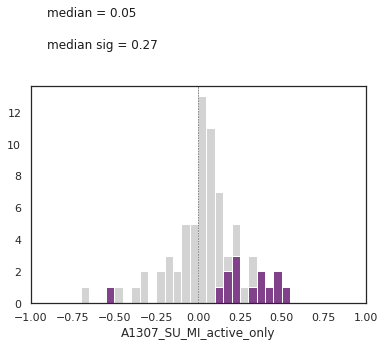

In [21]:
# plot histogram of MI beh only and significant beh cells isolation >=90
plot_hist(df = d307_MI_beh_only_iso, color = 'lightgrey', brain_region = 'A1307_SU', column = 'MI_active_only', 
          bins=np.arange(-1, 1, 0.05), df_sig = d307_MI_beh_only_sig_beh_iso, color_sig = color_ba,
          bins_sig=np.arange(-1, 1, 0.05))

In [22]:
# use one_state funciton to pull a dataframe containing MIbeh, wich is the difference between MIpupbeh and MIpupbeh0
d307_MI_beh_unique_iso = one_state(d_pb307_iso, col_idx='MI', state='unique', state_chan_val='active', 
                             state_sig1='st.pup.beh', state_sig2='st.pup.beh0', condition='pb')

d307_MI_beh_unique_sig_beh_iso = d307_MI_beh_unique_iso.loc[cellid_sig_307_beh_iso]
d307_MI_beh_unique_sig_beh_iso

state_chan,active,active0,MI_active_unique
cellid,,,
BRT026c-05-2,0.163445,0.090434,0.073011
BRT026c-07-1,0.243757,0.111440,0.132318
BRT026c-17-1,0.309693,0.136053,0.173640
BRT026c-19-1,0.423923,0.286382,0.137541
BRT026c-33-1,0.526744,0.232283,0.294461
BRT034f-07-1,0.195947,0.092515,0.103432
BRT036b-12-1,0.486033,0.088562,0.397471
BRT036b-28-1,0.452695,0.152580,0.300116
TAR010c-15-1,-0.467203,-0.421753,-0.045450


0.02486935391674521 0.13492935161212294


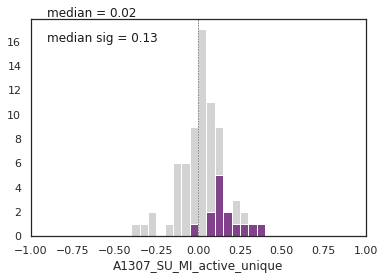

In [23]:
# plot histogram of MI beh unique and significant beh cells
plot_hist(df = d307_MI_beh_unique_iso, color = 'lightgrey', brain_region = 'A1307_SU', column = 'MI_active_unique', 
          bins=np.arange(-1, 1, 0.05), df_sig = d307_MI_beh_unique_sig_beh_iso, color_sig = color_ba,
          bins_sig=np.arange(-1, 1, 0.05))

In [24]:
print(d307_MI_beh_unique_sig_beh_iso.shape)
print(d307_MI_beh_unique_iso.shape)

(14, 3)
(72, 3)


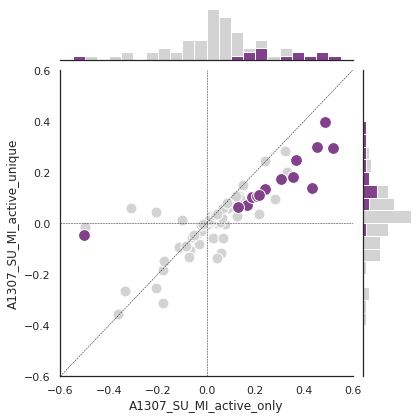

In [25]:
# purples cells are significant behavior modulation (pupil regressed out)
scatter_states_margin_2(df1=d307_MI_beh_only_iso, df2=d307_MI_beh_unique_iso, df1_sig=d307_MI_beh_only_sig_beh_iso, 
                        margin=True,df2_sig=d307_MI_beh_unique_sig_beh_iso, column1='MI_active_only', 
                        column2='MI_active_unique', color='lightgrey', color_sig=color_ba, brain_region='A1307_SU', 
                        bins=np.arange(-0.6, 0.6, 0.05), xlim=(-0.6,0.6), ylim=(-0.6,0.6), dot_size1=120, dot_size2=140)

## ALL UNTIS A1

**Find A1 units for which the model prediction with behavior as state variable signifantly predicts behavior modulation**  
`significant beh cells = r_pup0_beh - r_pup0_beh0 > rse_pup0_beh + rse_pup0_beh0 where 'r' is Pearson's correlation`

In [26]:
cellid_sig_307_beh = find_sig_cellids(d_pb307, state_chan_val='active', condition='pb', sign_type = 'beh')

**Find A1 units for which the full model prediction is signifantly better than the null model prediction**  
`significant state units = r_pup_beh - r_pup0_beh0 > rse_pup0_beh0 where 'r' is Pearson's correlation`

In [27]:
cellid_sig_307_state = find_sig_cellids(d_pb307, state_chan_val='active', condition='pb', sign_type = 'state')

In [28]:
d_pb307.head()

,cellid,modelname,state_sig,state_chan,MI,isolation,r,r_se,d,g,state_chan_alt,R2
0,BRT039c-40-1,psth.fs20.pup-ld-st.pup0.beh0-ref-psthfr.s_sde...,st.pup0.beh0,baseline,NaN,95.4293,0.452884,0.025611,0.026288,1.022688,baseline,0.205103
1,BRT039c-40-1,psth.fs20.pup-ld-st.pup0.beh0-ref-psthfr.s_sde...,st.pup0.beh0,pupil,0.010855,95.4293,0.452884,0.025611,0.013340,0.027984,pupil,0.205103
2,BRT039c-40-1,psth.fs20.pup-ld-st.pup0.beh0-ref-psthfr.s_sde...,st.pup0.beh0,active,-0.000702,95.4293,0.452884,0.025611,0.031175,0.021035,active,0.205103
3,BRT039c-03-1,psth.fs20.pup-ld-st.pup0.beh0-ref-psthfr.s_sde...,st.pup0.beh0,baseline,NaN,95.0000,0.503120,0.023189,0.000657,1.033564,baseline,0.253130
4,BRT039c-03-1,psth.fs20.pup-ld-st.pup0.beh0-ref-psthfr.s_sde...,st.pup0.beh0,pupil,-0.005557,95.0000,0.503120,0.023189,0.005256,0.022866,pupil,0.253130


**Let's extract data for the plot of MI behavior only**  
`MIbeh = MIpup0beh-MIpup0beh0`

In [29]:
# use one_state funciton to pull a dataframe containing MIbeh, wich is the difference between MIpup0beh and MIpup0beh0
d307_MI_beh_only = one_state(d_pb307, col_idx='MI', state='only', state_chan_val='active', 
                             state_sig1='st.pup0.beh', state_sig2='st.pup0.beh0', condition='pb')

# get the cellids of units with sign behavioral modulation (after pupil regressed out)
d307_MI_beh_only_sig_beh = d307_MI_beh_only.loc[cellid_sig_307_beh]

# get the cellids of units with significant state (either beh or pupil) modulation 
d307_MI_beh_only_sig_state = d307_MI_beh_only.loc[cellid_sig_307_state]


0.047867298871429924 0.21794848183646892


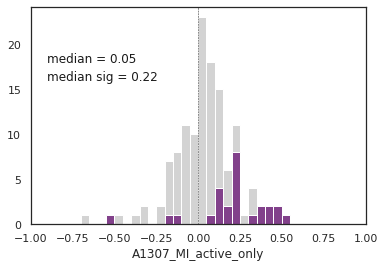

In [30]:
# plot histogram of MI beh only and significant beh cells
plot_hist(df = d307_MI_beh_only, color = 'lightgrey', brain_region = 'A1307', column = 'MI_active_only', 
          bins=np.arange(-1, 1, 0.05), df_sig = d307_MI_beh_only_sig_beh, color_sig = color_ba,
          bins_sig=np.arange(-1, 1, 0.05))

**Now let's do the same for the plot of MI behavior unique**  
`MIunique = MIpupbeh - MIpupbeh0`

In [31]:
# use one_state funciton to pull a dataframe containing MIbeh, wich is the difference between MIpupbeh and MIpupbeh0
d307_MI_beh_unique = one_state(d_pb307, col_idx='MI', state='unique', state_chan_val='active', 
                             state_sig1='st.pup.beh', state_sig2='st.pup.beh0', condition='pb')

d307_MI_beh_unique_sig_beh = d307_MI_beh_unique.loc[cellid_sig_307_beh]

d307_MI_beh_unique_sig_state = d307_MI_beh_unique.loc[cellid_sig_307_state]



0.011832457802404772 0.10814463187800855


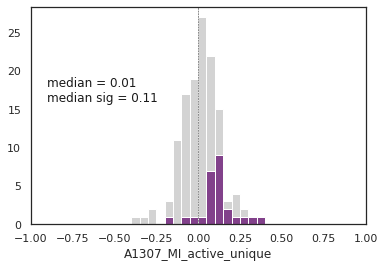

In [32]:
# plot histogram of MI beh unique and significant beh cells
plot_hist(df = d307_MI_beh_unique, color = 'lightgrey', brain_region = 'A1307', column = 'MI_active_unique', 
          bins=np.arange(-1, 1, 0.05), df_sig = d307_MI_beh_unique_sig_beh, color_sig = color_ba,
          bins_sig=np.arange(-1, 1, 0.05))

In [33]:
print(d307_MI_beh_unique_sig_state.shape)
print(d307_MI_beh_unique_sig_beh.shape)

(51, 3)
(26, 3)


**Scatter plot of MIbeh only (MIpup0beh - MIpup0beh0) vs MIbeh unique (= MIpupbeh - MIpupbeh0)**

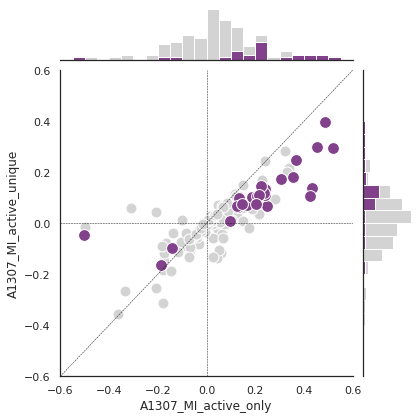

In [34]:
# purples cells are significant behavior modulation (pupil regressed out)
scatter_states_margin_2(df1=d307_MI_beh_only, df2=d307_MI_beh_unique, df1_sig=d307_MI_beh_only_sig_beh, margin=True,
                        df2_sig=d307_MI_beh_unique_sig_beh, column1='MI_active_only', column2='MI_active_unique', 
                        color='lightgrey', color_sig=color_ba, brain_region='A1307', bins=np.arange(-0.6, 0.6, 0.05), 
                        xlim=(-0.6,0.6), ylim=(-0.6,0.6), dot_size1=120, dot_size2=140)

In [35]:
# print the absolute median for MI beh unique significant behavior modulated cells
abs_med_d307_MI_beh_unique_sig_beh = abs(d307_MI_beh_unique_sig_beh['MI_active_unique'].median())
print(abs_med_d307_MI_beh_unique_sig_beh)

0.10814463187800855


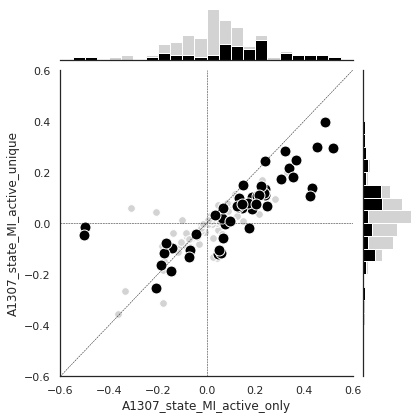

In [36]:
# black cells are significant state modulation (either pupil or behavior)
scatter_states_margin_2(df1=d307_MI_beh_only, df2=d307_MI_beh_unique, df1_sig=d307_MI_beh_only_sig_state, margin=True,
                        df2_sig=d307_MI_beh_unique_sig_state, column1='MI_active_only', column2='MI_active_unique', 
                        color='lightgrey', color_sig='black', brain_region='A1307_state', bins=np.arange(-0.6, 0.6, 0.05), 
                        xlim=(-0.6,0.6), ylim=(-0.6,0.6), dot_size1=60, dot_size2=120)

### Plot MIbeh-unique vs. MIpup-unique scatter plot for A1


In [37]:
# use one_state funciton to pull a dataframe containing MIpup, wich is the difference between MIpupbeh and MIpup0beh
d307_MI_pup_unique = one_state(d_pb307, col_idx='MI', state='unique', state_chan_val='pupil', 
                             state_sig1='st.pup.beh', state_sig2='st.pup0.beh')

d307_MI_pup_unique_sig_state = d307_MI_pup_unique.loc[cellid_sig_307_state]

cellid_sig_307_upup = find_sig_cellids(d_pb307, state_chan_val='active', condition='pb', sign_type = 'upup')

d307_MI_pup_unique_sig_upup = d307_MI_pup_unique.loc[cellid_sig_307_upup]
print(len(cellid_sig_307_upup))
print(len(cellid_sig_307_beh))

16
26


0.036123588648010685 0.10791798717768214


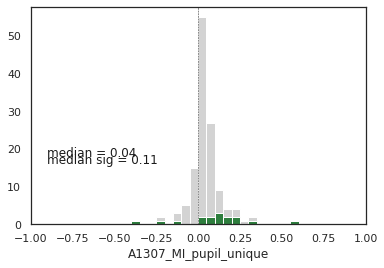

In [38]:
# plot histogram of MI beh unique and significant beh cells
plot_hist(df = d307_MI_pup_unique, color = 'lightgrey', brain_region = 'A1307', column = 'MI_pupil_unique', 
          bins=np.arange(-1, 1, 0.05), df_sig = d307_MI_pup_unique_sig_upup, color_sig = color_p,
          bins_sig=np.arange(-1, 1, 0.05))

In [39]:
# use one_state funciton to pull a dataframe containing MIpup only, wich is the difference between MIpupbeh0 and MIpup0beh0
#d307_MI_pup_only = one_state(d_pb307, col_idx='MI', state='only', state_chan_val='pupil', 
                            # state_sig1='st.pup.beh0', state_sig2='st.pup0.beh0', condition='pb')

# pull out significant state cells
#d307_MI_pup_only_sig_state = d307_MI_pup_only.loc[cellid_sig_307_state]

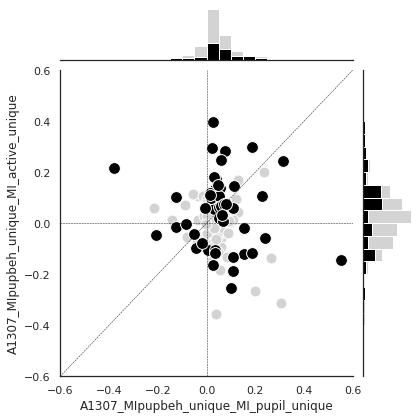

In [40]:
scatter_states_margin_2(df1=d307_MI_pup_unique, df2=d307_MI_beh_unique, df1_sig=d307_MI_pup_unique_sig_state, margin=True,
                        df2_sig=d307_MI_beh_unique_sig_state, column2='MI_active_unique', column1='MI_pupil_unique', 
                        color='lightgrey', color_sig='black', brain_region='A1307_MIpupbeh_unique', 
                        bins=np.arange(-0.6, 0.6, 0.05), xlim=(-0.6,0.6), ylim=(-0.6,0.6), dot_size1=120, dot_size2=140)

In [41]:
MI307_pup_beh_unique_cc = np.corrcoef(d307_MI_pup_unique['MI_pupil_unique'], d307_MI_beh_unique['MI_active_unique'])
print(MI307_pup_beh_unique_cc)

[[ 1.         -0.14482231]
 [-0.14482231  1.        ]]


In [42]:
# verify if correlation is significant
(cc_MI_307, p_MI_307)=sci.stats.pearsonr(d307_MI_pup_unique['MI_pupil_unique'], d307_MI_beh_unique['MI_active_unique'])
print(cc_MI_307, p_MI_307)

-0.14482231054382744 0.10152606920350146


In [43]:
d307_MI_pup_unique_sig_state.shape

(51, 3)

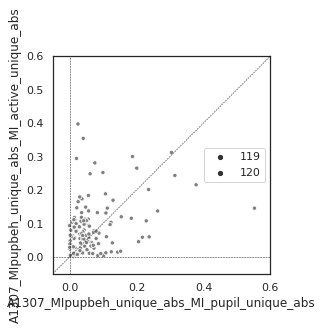

In [44]:
# use one_state funciton to pull a dataframe containing ABSOLUTE MIbeh, wich is the difference between MIpupbeh and MIpupbeh0
d307_MI_beh_unique_abs = one_state(d_pb307, col_idx='MI', state='unique', state_chan_val='active', 
                             state_sig1='st.pup.beh', state_sig2='st.pup.beh0', condition='pb', absolute=1)

# use one_state funciton to pull a dataframe containing ABSOLUTE MIpup, wich is the difference between MIpupbeh and MIpup0beh
d307_MI_pup_unique_abs = one_state(d_pb307, col_idx='MI', state='unique', state_chan_val='pupil', 
                             state_sig1='st.pup.beh', state_sig2='st.pup0.beh', condition='pb', absolute=1)

scatter_states_margin_2(df1=d307_MI_pup_unique_abs, df2=d307_MI_beh_unique_abs, margin=True, column2='MI_active_unique_abs', 
                        column1='MI_pupil_unique_abs', color='grey',brain_region='A1307_MIpupbeh_unique_abs', 
                        bins=np.arange(-0.05, 0.6, 0.05), xlim=(-0.05,0.6), ylim=(-0.05,0.6), dot_size1=120, dot_size2=140)


In [45]:
(cc_MI_307_abs, p_MI_307_abs)=sci.stats.pearsonr(d307_MI_pup_unique_abs['MI_pupil_unique_abs'], 
                                         d307_MI_beh_unique_abs['MI_active_unique_abs'])
print(cc_MI_307_abs, p_MI_307_abs)

0.32876741700432327 0.00014235538165799778


**Scatter plot of R2beh only vs R2beh unique in A1**  
`(R2pup0beh - R2pup0beh0) vs R2beh unique (R2pupbeh - R2pupbeh0)`

In [46]:
# use one_state funciton to pull a dataframe containing R2beh unique, wich is the difference between R2pupbeh and R2pupbeh0
d307_R2_beh_unique = one_state(d_pb307, col_idx='R2', state='unique', state_chan_val='active', 
                             state_sig1='st.pup.beh', state_sig2='st.pup.beh0', condition='pb')

d307_R2_beh_unique_sig_beh = d307_R2_beh_unique.loc[cellid_sig_307_beh]
d307_R2_beh_unique_sig_state = d307_R2_beh_unique.loc[cellid_sig_307_state]

In [47]:
# use one_state funciton to pull a dataframe containing R2beh only, wich is the difference between R2pup0beh and R2pup0beh0
d307_R2_beh_only = one_state(d_pb307, col_idx='R2', state='only', state_chan_val='active', 
                             state_sig1='st.pup0.beh', state_sig2='st.pup0.beh0', condition='pb')

d307_R2_beh_only_sig_beh = d307_R2_beh_only.loc[cellid_sig_307_beh]
d307_R2_beh_only_sig_state = d307_R2_beh_only.loc[cellid_sig_307_state]

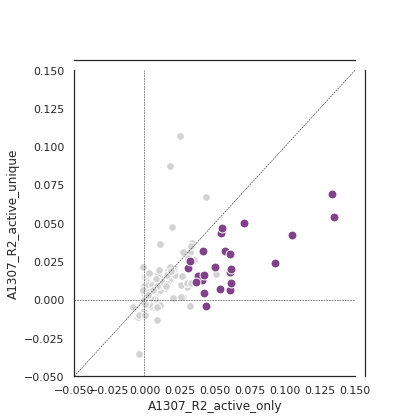

In [48]:
scatter_states_margin_2(df1=d307_R2_beh_only, df2=d307_R2_beh_unique, df1_sig=d307_R2_beh_only_sig_beh, margin=False,
                        df2_sig=d307_R2_beh_unique_sig_beh, column1='R2_active_only', column2='R2_active_unique', 
                        color='lightgrey', color_sig=color_ba, brain_region='A1307', xlim=(-0.05,0.15), ylim=(-0.05,0.15),
                       dot_size1=60, dot_size2=80)

**Scatter plot of R2beh unique vs R2pup unique in A1**  
`(R2pup0beh - R2pup0beh0) vs (R2pupbeh0 - R2pup0beh0)

In [49]:
# use one_state funciton to pull a dataframe containing R2pup unique, wich is the difference between R2pupbeh and R2pup0beh
d307_R2_pup_unique = one_state(d_pb307, col_idx='R2', state='unique', state_chan_val='pupil', 
                             state_sig1='st.pup.beh', state_sig2='st.pup0.beh', condition='pb')

d307_R2_pup_unique_sig_state = d307_R2_pup_unique.loc[cellid_sig_307_state]

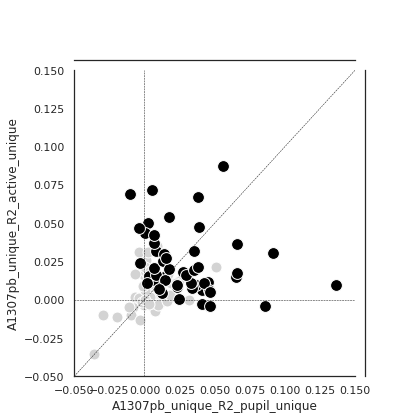

In [50]:
scatter_states_margin_2(df1=d307_R2_pup_unique, df2=d307_R2_beh_unique, df1_sig=d307_R2_pup_unique_sig_state,
                        df2_sig=d307_R2_beh_unique_sig_state, margin=False, column1='R2_pupil_unique', column2='R2_active_unique', 
                        color='lightgrey', color_sig='black', brain_region='A1307pb_unique', 
                        xlim=(-0.05,0.150), ylim=(-0.05,0.150), dot_size1=120, dot_size2=140)

In [51]:
# verify if correlation is significant
(cc_R2_307, p_R2_307)=sci.stats.pearsonr(d307_R2_pup_unique['R2_pupil_unique'], d307_R2_beh_unique['R2_active_unique'])
print(cc_R2_307, p_R2_307)

0.39838294141384734 2.928497721436365e-06


[[0.148 0.19  0.008 0.018 0.016 0.569]
 [0.368 0.408 0.009 0.019 0.011 0.282]
 [0.624 0.659 0.01  0.011 0.015 0.238]
 [0.849 0.873 0.009 0.01  0.006 0.182]]


(<matplotlib.axes._subplots.AxesSubplot at 0x7fc6eb8f4828>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc6eb855ac8>)

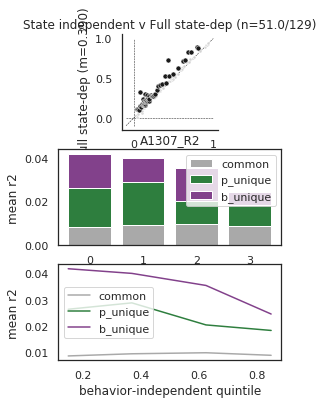

In [52]:
# using SVD function to pull out r2 scatter and stack
aud_vs_state(d_pb307, title='A1307_R2', nb=4, state_list=['st.pup0.beh0','st.pup0.beh','st.pup.beh0','st.pup.beh'])

[[0.148 0.19  0.008 0.018 0.016 0.569]
 [0.368 0.408 0.009 0.019 0.011 0.282]
 [0.624 0.659 0.01  0.011 0.015 0.238]
 [0.849 0.873 0.009 0.01  0.006 0.182]]


(<matplotlib.axes._subplots.AxesSubplot at 0x7fc70f2cfc88>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc6eb58edd8>)

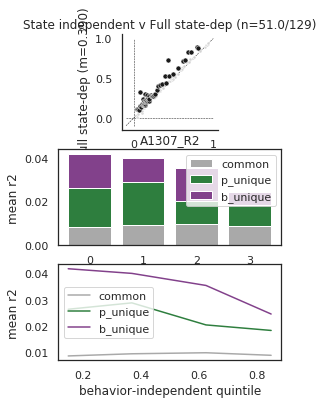

In [53]:
# using SVD function to pull out r2 scatter and stack
aud_vs_state(d_pb307, title='A1307_R2', nb=4, state_list=['st.pup0.beh0','st.pup0.beh','st.pup.beh0','st.pup.beh'])

### b) IC 309 MUA + SUA results 

In [54]:
# RUN IF CONNECTED TO SERVER
# IC SUA+MUA: pup vs. beh 307 per state dataframe
#batch = 309  # IC SUA and MUA
#state_list = ['st.pup0.beh0','st.pup0.beh','st.pup.beh0','st.pup.beh']
#basemodel = "-ref-psthfr.s_stategain.S"
#d_pb309 = get_model_results_per_state_model(batch=batch, state_list=state_list, basemodel=basemodel)

# Add column with R2 for variance analysis
#d_pb309['R2'] = d_pb309['r']**2

In [55]:
# IC SUA+MUA: pup vs. beh 309 per state dataframe
d_pb309 = pd.read_csv('d_309_pb.csv')
d_pb309 = d_pb309.drop(['Unnamed: 0'], axis=1)

# Add column with R2 for variance analysis
d_pb309['R2'] = d_pb309['r']**2 * np.sign(d_pb309['r'])
d_pb309.head()

,cellid,modelname,state_sig,state_chan,MI,isolation,r,r_se,d,g,state_chan_alt,R2
0,BRT016f-a1,psth.fs20.pup-ld-st.pup0.beh0-ref-psthfr.s_sde...,st.pup0.beh0,baseline,NaN,95.0,0.739416,0.011597,0.397252,1.186683,baseline,0.546736
1,BRT016f-a1,psth.fs20.pup-ld-st.pup0.beh0-ref-psthfr.s_sde...,st.pup0.beh0,pupil,-0.001858,95.0,0.739416,0.011597,0.012197,0.012355,pupil,0.546736
2,BRT016f-a1,psth.fs20.pup-ld-st.pup0.beh0-ref-psthfr.s_sde...,st.pup0.beh0,active,-0.000530,95.0,0.739416,0.011597,-0.075847,-0.034852,active,0.546736
3,bbl081d-a2,psth.fs20.pup-ld-st.pup0.beh0-ref-psthfr.s_sde...,st.pup0.beh0,baseline,NaN,75.0,0.315199,0.014672,0.002651,1.024474,baseline,0.099350
4,bbl081d-a2,psth.fs20.pup-ld-st.pup0.beh0-ref-psthfr.s_sde...,st.pup0.beh0,pupil,-0.021183,75.0,0.315199,0.014672,0.016872,0.011834,pupil,0.099350


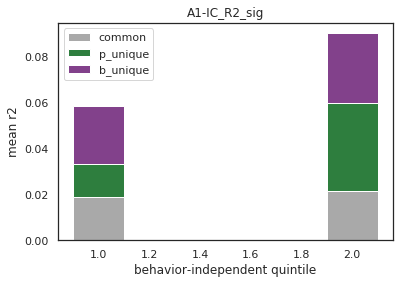

In [56]:
state_var(d_pb307, d_pb309, area1='A1', area2='IC', title='A1-IC_R2_sig', 
          state_list=['st.pup0.beh0','st.pup0.beh','st.pup.beh0','st.pup.beh'], sig=True)

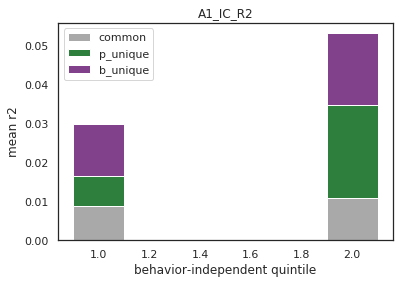

In [57]:
state_var(d_pb307, d_pb309, area1='A1', area2='IC', title='A1_IC_R2', state_list=['st.pup0.beh0','st.pup0.beh','st.pup.beh0','st.pup.beh'], 
              sig=False)

[[0.128 0.215 0.012 0.05  0.025 0.633]
 [0.335 0.408 0.023 0.021 0.029 0.455]
 [0.589 0.633 0.003 0.035 0.007 0.385]
 [0.832 0.851 0.006 0.008 0.005 0.417]]


(<matplotlib.axes._subplots.AxesSubplot at 0x7fc6eb6ca208>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc70f478ef0>)

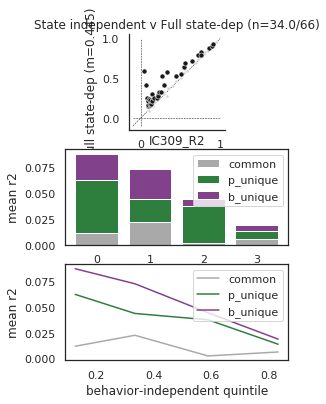

In [58]:
# using SVD function to pull out r2 scatter and stack
aud_vs_state(d_pb309, title='IC309_R2', nb=4, state_list=['st.pup0.beh0','st.pup0.beh','st.pup.beh0','st.pup.beh'])

[[0.352 0.39  0.009 0.016 0.013 0.395]]


(<matplotlib.axes._subplots.AxesSubplot at 0x7fc6eb6b56d8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc70f4c92b0>)

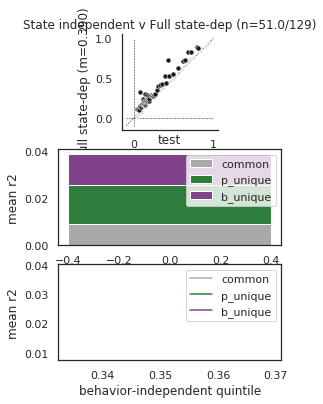

In [59]:
# using SVD function to pull out r2 scatter and stack
aud_vs_state(d_pb307, title='test', nb=1, state_list=['st.pup0.beh0','st.pup0.beh','st.pup.beh0','st.pup.beh'])

## ONLY ISOLATION >=90%

In [60]:
# find results only for IC units >= 90% isolation
d_pb309_iso = find_SUs(df=d_pb309, isolation=90.0)

In [61]:
# find significant beh cells for this subset of units
cellid_sig_309_beh_iso = find_sig_cellids(d_pb309_iso, state_chan_val='active', condition='pb', sign_type = 'beh')

In [62]:
# use one_state funciton to pull a dataframe containing MIbeh, wich is the difference between MIpup0beh and MIpup0beh0
d309_MI_beh_only_iso = one_state(d_pb309_iso, col_idx='MI', state='only', state_chan_val='active', 
                             state_sig1='st.pup0.beh', state_sig2='st.pup0.beh0', condition='pb')

# get the cellids of units with sign behavioral modulation (after pupil regressed out)
d309_MI_beh_only_sig_beh_iso = d309_MI_beh_only_iso.loc[cellid_sig_309_beh_iso]

0.0013078267710714994 -0.018570569697894695


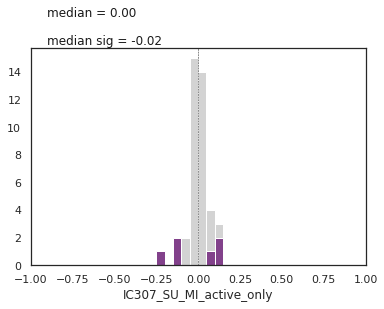

In [63]:
# plot histogram of MI beh only and significant beh cells isolation >=90
plot_hist(df = d309_MI_beh_only_iso, color = 'lightgrey', brain_region = 'IC307_SU', column = 'MI_active_only', 
          bins=np.arange(-1, 1, 0.05), df_sig = d309_MI_beh_only_sig_beh_iso, color_sig = color_ba,
          bins_sig=np.arange(-1, 1, 0.05))

In [64]:
# use one_state funciton to pull a dataframe containing MIbeh, wich is the difference between MIpupbeh and MIpupbeh0
d309_MI_beh_unique_iso = one_state(d_pb309_iso, col_idx='MI', state='unique', state_chan_val='active', 
                             state_sig1='st.pup.beh', state_sig2='st.pup.beh0', condition='pb')

d309_MI_beh_unique_sig_beh_iso = d309_MI_beh_unique_iso.loc[cellid_sig_309_beh_iso]

-0.0032008514787556543 -0.004191520602064687


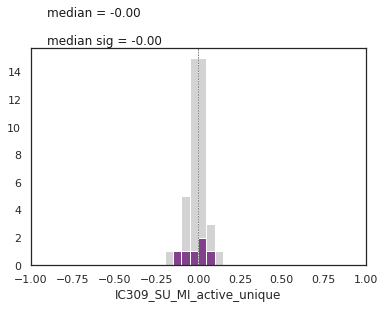

In [65]:
# plot histogram of MI beh unique and significant beh cells
plot_hist(df = d309_MI_beh_unique_iso, color = 'lightgrey', brain_region = 'IC309_SU', column = 'MI_active_unique', 
          bins=np.arange(-1, 1, 0.05), df_sig = d309_MI_beh_unique_sig_beh_iso, color_sig = color_ba,
          bins_sig=np.arange(-1, 1, 0.05))

In [66]:
print(d309_MI_beh_unique_sig_beh_iso.shape)
print(d309_MI_beh_unique_iso.shape)

(6, 3)
(41, 3)


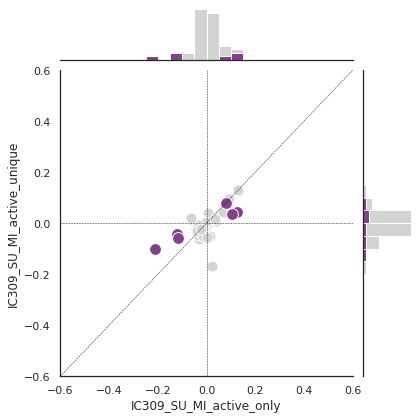

In [67]:
# purples cells are significant behavior modulation (pupil regressed out)
scatter_states_margin_2(df1=d309_MI_beh_only_iso, df2=d309_MI_beh_unique_iso, df1_sig=d309_MI_beh_only_sig_beh_iso, 
                        margin=True,df2_sig=d309_MI_beh_unique_sig_beh_iso, column1='MI_active_only', 
                        column2='MI_active_unique', color='lightgrey', color_sig=color_ba, brain_region='IC309_SU', 
                        bins=np.arange(-0.6, 0.6, 0.05), xlim=(-0.6,0.6), ylim=(-0.6,0.6), dot_size1=120, dot_size2=140)

**Find IC units for which the full model prediction is signifantly better than the null model prediction**  
`significant state units = r_pup_beh - r_pup0_beh0 > rse_pup0_beh0 where 'r' is Pearson's correlation`

In [68]:
cellid_sig_309_beh = find_sig_cellids(d_pb309, state_chan_val='active', condition='pb', sign_type = 'beh')

**Find IC units for which the full model prediction is signifantly better than the null model prediction**  
`significant state units = r_pup_beh - r_pup0_beh0 > rse_pup0_beh0 where 'r' is Pearson's correlation`

In [69]:
cellid_sig_309_state = find_sig_cellids(d_pb309, state_chan_val='active', condition='pb', sign_type = 'state')

In [70]:

# use one_state funciton to pull a dataframe containing MIbeh only, wich is the difference between MIpup0beh and MIpup0beh0
d309_MI_beh_only = one_state(d_pb309, col_idx='MI', state='only', state_chan_val='active', 
                             state_sig1='st.pup0.beh', state_sig2='st.pup0.beh0', condition='pb')

d309_MI_beh_only_sig_beh = d309_MI_beh_only.loc[cellid_sig_309_beh]

d309_MI_beh_only_sig_state = d309_MI_beh_only.loc[cellid_sig_309_state]

-0.002356046458243305 0.0816830002513236


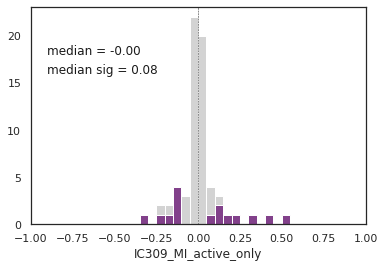

In [71]:
# plot histogram
plot_hist(df = d309_MI_beh_only, df_sig = d309_MI_beh_only_sig_beh, bins=np.arange(-1, 1, 0.05), 
          bins_sig=np.arange(-1, 1, 0.05), color='lightgrey', color_sig=color_ba, 
          brain_region='IC309', column='MI_active_only')

In [72]:
# use one_state funciton to pull a dataframe containing MIbeh unique, wich is the difference between MIpupbeh and MIpupbeh0
d309_MI_beh_unique = one_state(d_pb309, col_idx='MI', state='unique', state_chan_val='active', 
                             state_sig1='st.pup.beh', state_sig2='st.pup.beh0', condition='pb')

d309_MI_beh_unique_sig_beh = d309_MI_beh_unique.loc[cellid_sig_309_beh]
d309_MI_beh_unique_sig_state = d309_MI_beh_unique.loc[cellid_sig_309_state]

-0.00807015071429156 0.00028341075604036703


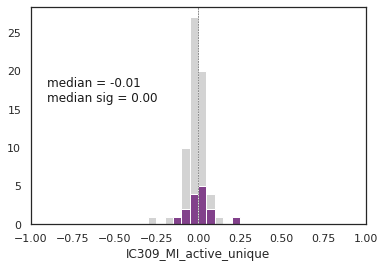

In [73]:
# plot histogram
plot_hist(df=d309_MI_beh_unique, df_sig=d309_MI_beh_unique_sig_beh, bins=np.arange(-1, 1, 0.05), 
          bins_sig=np.arange(-1, 1, 0.05), color='lightgrey', color_sig=color_ba, brain_region='IC309', 
          column='MI_active_unique')

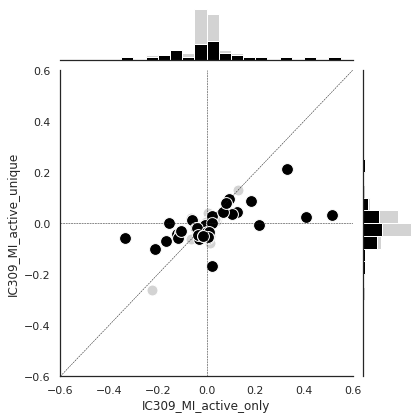

In [74]:
scatter_states_margin_2(df1=d309_MI_beh_only, df2=d309_MI_beh_unique, df1_sig=d309_MI_beh_only_sig_state, 
                        df2_sig=d309_MI_beh_unique_sig_state, column1='MI_active_only', column2='MI_active_unique', 
                        color='lightgrey', color_sig='black', brain_region='IC309', bins=np.arange(-0.6, 0.6, 0.05), 
                        xlim=(-0.6,0.6), ylim=(-0.6,0.6), dot_size1=120, dot_size2=140)

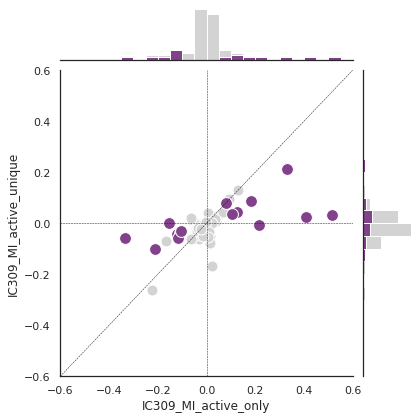

In [75]:
scatter_states_margin_2(df1=d309_MI_beh_only, df2=d309_MI_beh_unique, df1_sig=d309_MI_beh_only_sig_beh, 
                        df2_sig=d309_MI_beh_unique_sig_beh, column1='MI_active_only', column2='MI_active_unique', 
                        color='lightgrey', color_sig=color_ba, brain_region='IC309', bins=np.arange(-0.6, 0.6, 0.05), 
                        xlim=(-0.6,0.6), ylim=(-0.6,0.6), dot_size1=120, dot_size2=140)

In [76]:
print(d309_MI_beh_unique_sig_beh.shape)
print(d309_MI_beh_unique_sig_state.shape)
print(d309_MI_beh_unique.shape)

(15, 3)
(34, 3)
(66, 3)


In [77]:
abs_med_d309_MI_beh_unique_sig_beh = abs(d309_MI_beh_unique_sig_beh['MI_active_unique'].median())
print(abs_med_d309_MI_beh_unique_sig_beh)

0.00028341075604036703


In [78]:
# use one_state funciton to pull a dataframe containing MIpup unique, wich is the difference between MIpupbeh and MIpup0beh
d309_MI_pup_unique = one_state(d_pb309, col_idx='MI', state='unique', state_chan_val='pupil', 
                             state_sig1='st.pup.beh', state_sig2='st.pup0.beh', condition='pb')

d309_MI_pup_unique_sig_state = d309_MI_pup_unique.loc[cellid_sig_309_state]

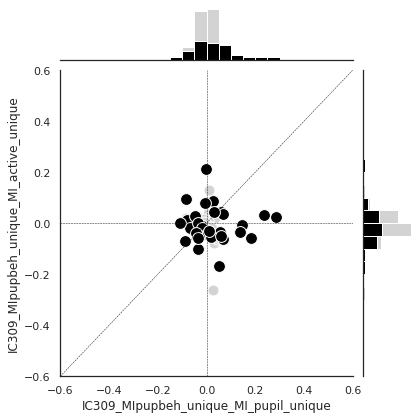

In [79]:
scatter_states_margin_2(df1=d309_MI_pup_unique, df2=d309_MI_beh_unique, df1_sig=d309_MI_pup_unique_sig_state, margin=True,
                        df2_sig=d309_MI_beh_unique_sig_state, column2='MI_active_unique', column1='MI_pupil_unique', 
                        color='lightgrey', color_sig='black', brain_region='IC309_MIpupbeh_unique', 
                        bins=np.arange(-0.6, 0.6, 0.05), xlim=(-0.6,0.6), ylim=(-0.6,0.6), dot_size1=120, dot_size2=140)

In [80]:
MI309_pup_beh_unique_cc = np.corrcoef(d309_MI_pup_unique['MI_pupil_unique'], d309_MI_beh_unique['MI_active_unique'])
print(MI309_pup_beh_unique_cc)

[[ 1.         -0.08249631]
 [-0.08249631  1.        ]]


In [81]:
(cc_MI_309, p_MI_309)=sci.stats.pearsonr(d309_MI_pup_unique['MI_pupil_unique'], d309_MI_beh_unique['MI_active_unique'])
print(cc_MI_309, p_MI_309)

-0.0824963109025587 0.5102029379122626


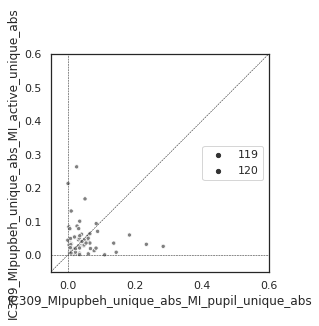

In [82]:
# use one_state funciton to pull a dataframe containing ABSOLUTE MIbeh, wich is the difference between MIpupbeh and MIpupbeh0
d309_MI_beh_unique_abs = one_state(d_pb309, col_idx='MI', state='unique', state_chan_val='active', 
                             state_sig1='st.pup.beh', state_sig2='st.pup.beh0', condition='pb', absolute=1)

# use one_state funciton to pull a dataframe containing ABSOLUTE MIpup, wich is the difference between MIpupbeh and MIpup0beh
d309_MI_pup_unique_abs = one_state(d_pb309, col_idx='MI', state='unique', state_chan_val='pupil', 
                             state_sig1='st.pup.beh', state_sig2='st.pup0.beh', condition='pb', absolute=1)

scatter_states_margin_2(df1=d309_MI_pup_unique_abs, df2=d309_MI_beh_unique_abs, margin=True, column2='MI_active_unique_abs', 
                        column1='MI_pupil_unique_abs', color='grey',brain_region='IC309_MIpupbeh_unique_abs', 
                        bins=np.arange(-0.05, 0.6, 0.05), xlim=(-0.05,0.6), ylim=(-0.05,0.6), dot_size1=120, dot_size2=140)


In [83]:
(cc_MI_309_abs, p_MI_309_abs)=sci.stats.pearsonr(d309_MI_pup_unique_abs['MI_pupil_unique_abs'], 
                                         d309_MI_beh_unique_abs['MI_active_unique_abs'])
print(cc_MI_309_abs, p_MI_309_abs)

-0.06453578923473062 0.6066851170134187


In [84]:
# use one_state funciton to pull a dataframe containing R2beh unique, wich is the difference between R2pupbeh and R2pupbeh0
d309_R2_beh_unique = one_state(d_pb309, col_idx='R2', state='unique', state_chan_val='active', 
                             state_sig1='st.pup.beh', state_sig2='st.pup.beh0', condition='pb')

d309_R2_beh_unique_sig_beh = d309_R2_beh_unique.loc[cellid_sig_309_beh]
d309_R2_beh_unique_sig_state = d309_R2_beh_unique.loc[cellid_sig_309_state]

In [85]:
# use one_state funciton to pull a dataframe containing R2pup unique, wich is the difference between R2pupbeh and R2pup0beh
d309_R2_pup_unique = one_state(d_pb309, col_idx='R2', state='unique', state_chan_val='pupil', 
                             state_sig1='st.pup.beh', state_sig2='st.pup0.beh', condition='pb')

d309_R2_pup_unique_sig_beh = d309_R2_pup_unique.loc[cellid_sig_309_beh]
d309_R2_pup_unique_sig_state = d309_R2_pup_unique.loc[cellid_sig_309_state]

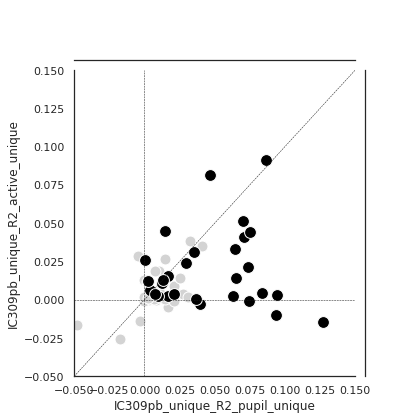

In [86]:
scatter_states_margin_2(df1=d309_R2_pup_unique, df2=d309_R2_beh_unique, df1_sig=d309_R2_pup_unique_sig_state,
                        df2_sig=d309_R2_beh_unique_sig_state, margin=False, column1='R2_pupil_unique', column2='R2_active_unique', 
                        color='lightgrey', color_sig='black', brain_region='IC309pb_unique', 
                        xlim=(-0.05,0.15), ylim=(-0.05,0.15), dot_size1=120, dot_size2=140)

In [87]:
# verify if correlation is significant
(cc_R2_309, p_R2_309)=sci.stats.pearsonr(d309_R2_pup_unique['R2_pupil_unique'], d309_R2_beh_unique['R2_active_unique'])
print(cc_R2_309, p_R2_309)

0.38444385337775905 0.0014375641736581418


[[0.114 0.204 0.017 0.05  0.023 0.577]
 [0.271 0.353 0.017 0.033 0.031 0.667]
 [0.514 0.556 0.001 0.029 0.013 0.333]
 [0.738 0.773 0.005 0.023 0.007 0.444]
 [0.874 0.886 0.002 0.006 0.004 0.429]]


(<matplotlib.axes._subplots.AxesSubplot at 0x7fc70f30d080>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc6eb84eda0>)

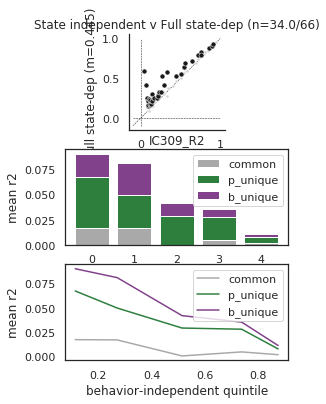

In [88]:
# using SVD function to pull out r2 scatter and stack
aud_vs_state(d_pb309, title='IC309_R2', nb=5, state_list=['st.pup0.beh0','st.pup0.beh','st.pup.beh0','st.pup.beh'])

## Prepassive / 1st postpassive analysis for A1

In [89]:
# RUN IF CONNECTED TO SERVER
# A1 SUA+MUA: pup vs. pas 307 per state dataframe
#batch = 307  # A1 SUA and MUA
#state_list = ['st.pup0.pas0','st.pup0.pas','st.pup.pas0','st.pup.pas']
#basemodel = "-ref-pas-psthfr.s_sdexp.S"
#d_pp307 = get_model_results_per_state_model(batch=batch, state_list=state_list, basemodel=basemodel)

# Add column with R2 for variance analysis
#d_pp307['R2'] = d_pp307['r']**2

In [90]:
# A1 SUA+MUA: pup vs. passive 307 per state dataframe
d_pp307 = pd.read_csv('d_307_pp.csv') # updated to sdexp model run on Nov 8, 2018
d_pp307 = d_pp307.drop(['Unnamed: 0'], axis=1)

# Add column with R2 for variance analysis
d_pp307['R2'] = d_pp307['r']**2

In [91]:
# Example cells TAR010c-27-2 (A1 behavior cell)
d_pp307.loc[d_pp307['cellid']=='TAR010c-27-2']

,cellid,modelname,state_sig,state_chan,MI,isolation,r,r_se,d,g,state_chan_alt,R2
151,TAR010c-27-2,psth.fs20.pup-ld-st.pup0.pas0-ref-pas-psthfr.s...,st.pup0.pas0,baseline,NaN,95.0,0.396048,0.024880,0.001360,1.034202,baseline,0.156854
152,TAR010c-27-2,psth.fs20.pup-ld-st.pup0.pas0-ref-pas-psthfr.s...,st.pup0.pas0,pupil,-0.002033,95.0,0.396048,0.024880,0.001403,0.026844,pupil,0.156854
153,TAR010c-27-2,psth.fs20.pup-ld-st.pup0.pas0-ref-pas-psthfr.s...,st.pup0.pas0,FILE_TAR010c10_p_PTD,0.001893,95.0,0.396048,0.024880,-0.041636,0.075518,PASSIVE_1,0.156854
154,TAR010c-27-2,psth.fs20.pup-ld-st.pup0.pas0-ref-pas-psthfr.s...,st.pup0.pas0,FILE_TAR010c12_p_PTD,-0.000652,95.0,0.396048,0.024880,-0.005301,-0.000813,PASSIVE_2,0.156854
506,TAR010c-27-2,psth.fs20.pup-ld-st.pup0.pas-ref-pas-psthfr.s_...,st.pup0.pas,baseline,NaN,95.0,0.398751,0.021383,-0.287613,0.720958,baseline,0.159003
507,TAR010c-27-2,psth.fs20.pup-ld-st.pup0.pas-ref-pas-psthfr.s_...,st.pup0.pas,pupil,-0.036154,95.0,0.398751,0.021383,-0.042397,0.000129,pupil,0.159003
508,TAR010c-27-2,psth.fs20.pup-ld-st.pup0.pas-ref-pas-psthfr.s_...,st.pup0.pas,FILE_TAR010c10_p_PTD,0.172947,95.0,0.398751,0.021383,2.712487,1.607692,PASSIVE_1,0.159003
509,TAR010c-27-2,psth.fs20.pup-ld-st.pup0.pas-ref-pas-psthfr.s_...,st.pup0.pas,FILE_TAR010c12_p_PTD,0.089756,95.0,0.398751,0.021383,0.772078,1.222777,PASSIVE_2,0.159003
942,TAR010c-27-2,psth.fs20.pup-ld-st.pup.pas0-ref-pas-psthfr.s_...,st.pup.pas0,baseline,NaN,95.0,0.424611,0.033033,-3.665804,-21.495270,baseline,0.180295
943,TAR010c-27-2,psth.fs20.pup-ld-st.pup.pas0-ref-pas-psthfr.s_...,st.pup.pas0,pupil,0.116086,95.0,0.424611,0.033033,14.978697,176.971028,pupil,0.180295


In [92]:
cellid_sig_pp307_beh = find_sig_cellids(d_pp307, state_chan_val='PASSIVE_1', condition='pp', sign_type = 'beh')
cellid_sig_pp307_state = find_sig_cellids(d_pp307, state_chan_val='PASSIVE_1', condition='pp', sign_type = 'state')

In [93]:
# use one_state funciton to pull a dataframe containing MIpas only, wich is the difference between MIpup0pas and MIpup0pas0
d307_MI_pas_only = one_state(d_pp307, col_idx='MI', state='only', state_chan_val='PASSIVE_1', 
                             state_sig1='st.pup0.pas', state_sig2='st.pup0.pas0', condition='pp')

d307_MI_pas_only_sig_beh = d307_MI_pas_only.loc[cellid_sig_pp307_beh]
d307_MI_pas_only_sig_state = d307_MI_pas_only.loc[cellid_sig_pp307_state]

0.006612649627292149 0.06757803336636362


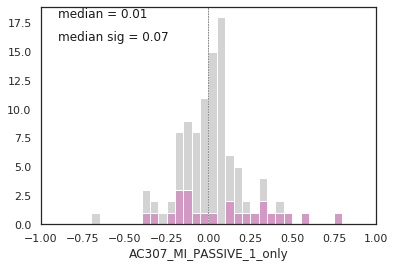

In [94]:
# plot histogram
plot_hist(df = d307_MI_pas_only, df_sig = d307_MI_pas_only_sig_beh, bins=np.arange(-1, 1, 0.05), 
          bins_sig=np.arange(-1, 1, 0.05), color='lightgrey', color_sig = color_bpas, brain_region='AC307', 
          column='MI_PASSIVE_1_only')

In [95]:
# use one_state funciton to pull a dataframe containing MIpas unique, wich is the difference between MIpuppas and MIpuppas0
d307_MI_pas_unique = one_state(d_pp307, col_idx='MI', state='unique', state_chan_val='PASSIVE_1', 
                             state_sig1='st.pup.pas', state_sig2='st.pup.pas0', condition='pp')

d307_MI_pas_unique_sig_beh = d307_MI_pas_unique.loc[cellid_sig_pp307_beh]
d307_MI_pas_unique_sig_state = d307_MI_pas_unique.loc[cellid_sig_pp307_state]

0.01724470185829132 0.04699628895791641


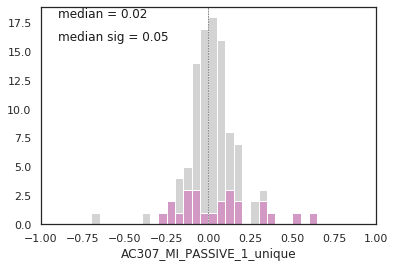

In [96]:
# plot histogram
plot_hist(df = d307_MI_pas_unique, df_sig = d307_MI_pas_unique_sig_beh, bins=np.arange(-1, 1, 0.05), 
          bins_sig=np.arange(-1, 1, 0.05), color='lightgrey', color_sig=color_bpas, brain_region='AC307', 
          column='MI_PASSIVE_1_unique')

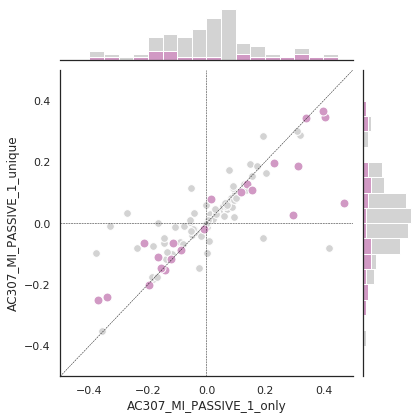

In [97]:
scatter_states_margin_2(df1=d307_MI_pas_only, df2=d307_MI_pas_unique, df1_sig=d307_MI_pas_only_sig_beh, margin=True,
                        df2_sig=d307_MI_pas_unique_sig_beh, column1='MI_PASSIVE_1_only', column2='MI_PASSIVE_1_unique', 
                        color='lightgrey', color_sig=color_bpas, brain_region='AC307', bins=np.arange(-0.5, 0.5, 0.05), 
                        xlim=(-0.5,0.5), ylim=(-0.5,0.5), dot_size1=60, dot_size2=80)

## Prepassive / 1st postpassive analysis for IC

In [98]:
# RUN IF CONNECTED TO SERVER
# IC SUA+MUA: pup vs. pas 307 per state dataframe
#batch = 309  # IC SUA and MUA
#state_list = ['st.pup0.pas0','st.pup0.pas','st.pup.pas0','st.pup.pas']
#basemodel = "-ref-pas-psthfr.s_sdexp.S"
#d_pp309 = get_model_results_per_state_model(batch=batch, state_list=state_list, basemodel=basemodel)

# Add column with R2 for variance analysis
#d_pp309['R2'] = d_pp309['r']**2

In [99]:
# IC SUA+MUA: pup vs. passive 309 per state dataframe
d_pp309 = pd.read_csv('d_309_pp.csv') # run Nov 8 with sdexp model
d_pp309 = d_pp309.drop(['Unnamed: 0'], axis=1)

# Add column with R2 for variance analysis
d_pp309['R2'] = d_pp309['r']**2

In [100]:
d_pp309.head()

,cellid,modelname,state_sig,state_chan,MI,isolation,r,r_se,d,g,state_chan_alt,R2
0,BRT016f-a1,psth.fs20.pup-ld-st.pup0.pas0-ref-pas-psthfr.s...,st.pup0.pas0,baseline,NaN,95.0,0.740128,0.014666,0.323541,1.146442,baseline,0.547789
1,BRT016f-a1,psth.fs20.pup-ld-st.pup0.pas0-ref-pas-psthfr.s...,st.pup0.pas0,pupil,-0.002418,95.0,0.740128,0.014666,0.038094,-0.061375,pupil,0.547789
2,BRT016f-a1,psth.fs20.pup-ld-st.pup0.pas0-ref-pas-psthfr.s...,st.pup0.pas0,FILE_BRT016f05_p_PTD,-0.000580,95.0,0.740128,0.014666,-0.032446,0.096631,PASSIVE_1,0.547789
3,BRT016f-a1,psth.fs20.pup-ld-st.pup0.pas0-ref-pas-psthfr.s...,st.pup0.pas0,FILE_BRT016f08_p_PTD,-0.000267,95.0,0.740128,0.014666,-0.103111,0.157507,PASSIVE_2,0.547789
4,BRT016f-a1,psth.fs20.pup-ld-st.pup0.pas0-ref-pas-psthfr.s...,st.pup0.pas0,FILE_BRT016f09_p_PTD,0.001152,95.0,0.740128,0.014666,0.012520,-0.130038,PASSIVE_3,0.547789


In [101]:
cellid_sig_pp309_beh = find_sig_cellids(d_pp309, state_chan_val='PASSIVE_1', condition='pp', sign_type = 'beh')
cellid_sig_pp309_state = find_sig_cellids(d_pp309, state_chan_val='PASSIVE_1', condition='pp', sign_type = 'state')

In [102]:
# use one_state funciton to pull a dataframe containing MIpas only, wich is the difference between MIpup0pas and MIpup0pas0
d309_MI_pas_only = one_state(d_pp309, col_idx='MI', state='only', state_chan_val='PASSIVE_1', 
                             state_sig1='st.pup0.pas', state_sig2='st.pup0.pas0', condition='pp')

d309_MI_pas_only_sig_beh = d309_MI_pas_only.loc[cellid_sig_pp309_beh]

0.030699957462338594 0.11950421227133079


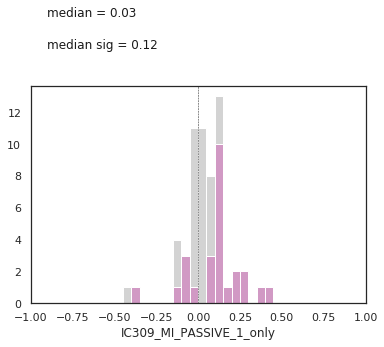

In [103]:
# plot histogram
plot_hist(df = d309_MI_pas_only, df_sig = d309_MI_pas_only_sig_beh, bins=np.arange(-1, 1, 0.05), 
          bins_sig=np.arange(-1, 1, 0.05), color='lightgrey', color_sig=color_bpas, brain_region='IC309', 
          column='MI_PASSIVE_1_only')

In [104]:
# use one_state funciton to pull a dataframe containing MIpup unique, wich is the difference between MIpuppas and MIpuppas0
d309_MI_pas_unique = one_state(d_pp309, col_idx='MI', state='unique', state_chan_val='PASSIVE_1', 
                             state_sig1='st.pup.pas', state_sig2='st.pup.pas0', condition='pp')

d309_MI_pas_unique_sig_beh = d309_MI_pas_unique.loc[cellid_sig_pp309_beh]

0.011066176897131345 0.025622125634202172


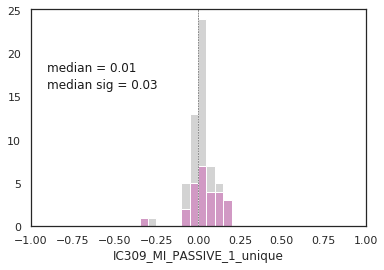

In [105]:
# plot histogram
plot_hist(df = d309_MI_pas_unique, df_sig = d309_MI_pas_unique_sig_beh, bins=np.arange(-1, 1, 0.05), 
          bins_sig=np.arange(-1, 1, 0.05), color='lightgrey', color_sig=color_bpas, brain_region='IC309', 
          column='MI_PASSIVE_1_unique')

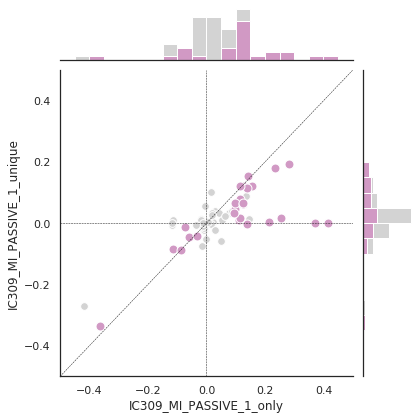

In [106]:
# plot scatter plot and margin of IC MI pas only vs IC MI pass unique
scatter_states_margin_2(df1=d309_MI_pas_only, df2=d309_MI_pas_unique, df1_sig=d309_MI_pas_only_sig_beh, margin=True,
                        df2_sig=d309_MI_pas_unique_sig_beh, column1='MI_PASSIVE_1_only', column2='MI_PASSIVE_1_unique', 
                        color='lightgrey', color_sig=color_bpas, brain_region='IC309', bins=np.arange(-0.5, 0.5, 0.05), 
                        xlim=(-0.5,0.5), ylim=(-0.5,0.5), dot_size1=60, dot_size2=80)

## Naive behavior vs naive prepost scatter plot


In [107]:
# AC SUA+MUA: pup vs. passive/behavior1 307
d_pf307 = pd.read_csv('st_pup_fil_batch307.csv') # model stategain run October 23rdish
d_pf307 = d_pf307.drop(['Unnamed: 0'], axis=1)

# Add column with R2 for variance analysis
d_pf307['R2'] = d_pf307['r']**2
d_pf307.head()

,cellid,modelname,state_sig,state_chan,MI,r,r_se,d,g,state_chan_alt,R2
0,BRT037b-24-1,psth.fs20.pup-ld-st.pup0.fil0-ref-psthfr.s_sde...,st.pup0.fil0,baseline,NaN,0.959431,0.0018,0.001463,1.061701,baseline,0.920508
1,BRT037b-24-1,psth.fs20.pup-ld-st.pup0.fil0-ref-psthfr.s_sde...,st.pup0.fil0,pupil,0.002610,0.959431,0.0018,-0.042127,0.024785,pupil,0.920508
2,BRT037b-24-1,psth.fs20.pup-ld-st.pup0.fil0-ref-psthfr.s_sde...,st.pup0.fil0,ACTIVE_0,0.001029,0.959431,0.0018,-0.049688,0.090151,ACTIVE_0,0.920508
3,BRT037b-24-1,psth.fs20.pup-ld-st.pup0.fil0-ref-psthfr.s_sde...,st.pup0.fil0,ACTIVE_1,0.000117,0.959431,0.0018,0.127461,-0.053641,ACTIVE_1,0.920508
4,BRT037b-24-1,psth.fs20.pup-ld-st.pup0.fil0-ref-psthfr.s_sde...,st.pup0.fil0,PASSIVE_1,0.000536,0.959431,0.0018,-0.044812,0.018358,PASSIVE_1,0.920508


In [108]:
# Example cells TAR010c-27-2 (A1 behavior cell)
d_pf307.loc[d_pf307['cellid']=='TAR010c-06-1']

,cellid,modelname,state_sig,state_chan,MI,r,r_se,d,g,state_chan_alt,R2
231,TAR010c-06-1,psth.fs20.pup-ld-st.pup0.fil0-ref-psthfr.s_sde...,st.pup0.fil0,baseline,NaN,0.622529,0.017913,-0.005797,1.027050,baseline,0.387542
232,TAR010c-06-1,psth.fs20.pup-ld-st.pup0.fil0-ref-psthfr.s_sde...,st.pup0.fil0,pupil,0.002406,0.622529,0.017913,-0.033247,-0.009832,pupil,0.387542
233,TAR010c-06-1,psth.fs20.pup-ld-st.pup0.fil0-ref-psthfr.s_sde...,st.pup0.fil0,ACTIVE_1,-0.001367,0.622529,0.017913,-0.006143,0.026716,ACTIVE_1,0.387542
234,TAR010c-06-1,psth.fs20.pup-ld-st.pup0.fil0-ref-psthfr.s_sde...,st.pup0.fil0,PASSIVE_1,-0.001660,0.622529,0.017913,0.026579,-0.027754,PASSIVE_1,0.387542
235,TAR010c-06-1,psth.fs20.pup-ld-st.pup0.fil0-ref-psthfr.s_sde...,st.pup0.fil0,ACTIVE_2,0.002831,0.622529,0.017913,0.006595,-0.164182,ACTIVE_2,0.387542
236,TAR010c-06-1,psth.fs20.pup-ld-st.pup0.fil0-ref-psthfr.s_sde...,st.pup0.fil0,PASSIVE_2,-0.000300,0.622529,0.017913,0.013547,0.074623,PASSIVE_2,0.387542
1035,TAR010c-06-1,psth.fs20.pup-ld-st.pup0.fil-ref-psthfr.s_sdex...,st.pup0.fil,baseline,NaN,0.715278,0.017044,0.172321,0.780064,baseline,0.511623
1036,TAR010c-06-1,psth.fs20.pup-ld-st.pup0.fil-ref-psthfr.s_sdex...,st.pup0.fil,pupil,0.190374,0.715278,0.017044,0.008065,-0.000795,pupil,0.511623
1037,TAR010c-06-1,psth.fs20.pup-ld-st.pup0.fil-ref-psthfr.s_sdex...,st.pup0.fil,ACTIVE_1,-0.099218,0.715278,0.017044,-0.249195,-0.427627,ACTIVE_1,0.511623
1038,TAR010c-06-1,psth.fs20.pup-ld-st.pup0.fil-ref-psthfr.s_sdex...,st.pup0.fil,PASSIVE_1,-0.209791,0.715278,0.017044,-0.328396,-0.730832,PASSIVE_1,0.511623


In [109]:
#cellid_sig_pf307 = find_sig_cellids(d_pf307, state_chan_val='ACTIVE_1', condition='pf')

In [110]:
d307_MI_fil_only = one_state(d_pf307, col_idx='MI', state='only', state_chan_val='ACTIVE_1', 
                             state_sig1='st.pup0.fil', state_sig2='st.pup0.fil0', condition='pf')

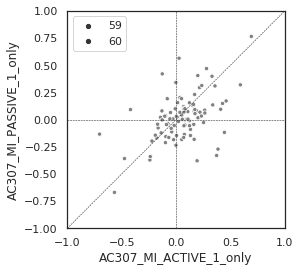

In [111]:
scatter_states_margin_2(df1=d307_MI_fil_only, df2=d307_MI_pas_only, column1='MI_ACTIVE_1_only', column2='MI_PASSIVE_1_only', 
                        color='grey', brain_region='AC307', xlim=(-1,1), ylim=(-1,1), dot_size1=60)

In [112]:
# use one_state funciton to pull a dataframe containing MIbeh, wich is the difference between MIpup0beh and MIpup0beh0
d307_MI_fil_unique = one_state(d_pf307, col_idx='MI', state='unique', state_chan_val='ACTIVE_1', 
                             state_sig1='st.pup.fil', state_sig2='st.pup.fil0', condition='pf')

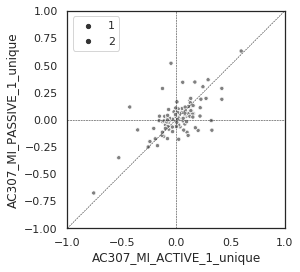

In [113]:
scatter_states_margin_2(df1=d307_MI_fil_unique, df2=d307_MI_pas_unique, column1='MI_ACTIVE_1_unique', 
                        column2='MI_PASSIVE_1_unique', color='grey', brain_region='AC307', xlim=(-1,1), ylim=(-1,1))

In [114]:
# AC SUA+MUA: pup vs. per file 307
d_pfil307 = pd.read_csv('ref-psthfr-s_sdexp-S-307_beh_fil.csv') # model sdexp.S run Nov 19th
d_pfil307 = d_pfil307.drop(['Unnamed: 0'], axis=1)

# Add column with R2 for variance analysis
d_pfil307['R2'] = d_pfil307['r']**2
d_pfil307.head(10)

,cellid,modelname,state_sig,state_chan,MI,isolation,r,r_se,d,g,state_chan_alt,R2
0,BRT037b-24-1,psth.fs20.pup-ld-st.pup0.fil0-ref-psthfr.s_sde...,st.pup0.fil0,baseline,NaN,85.0,0.959431,0.001800,0.001463,1.061701,baseline,0.920508
1,BRT037b-24-1,psth.fs20.pup-ld-st.pup0.fil0-ref-psthfr.s_sde...,st.pup0.fil0,pupil,0.002610,85.0,0.959431,0.001800,-0.042127,0.024785,pupil,0.920508
2,BRT037b-24-1,psth.fs20.pup-ld-st.pup0.fil0-ref-psthfr.s_sde...,st.pup0.fil0,ACTIVE_0,0.001029,85.0,0.959431,0.001800,-0.049688,0.090151,ACTIVE_0,0.920508
3,BRT037b-24-1,psth.fs20.pup-ld-st.pup0.fil0-ref-psthfr.s_sde...,st.pup0.fil0,ACTIVE_1,0.000117,85.0,0.959431,0.001800,0.127461,-0.053641,ACTIVE_1,0.920508
4,BRT037b-24-1,psth.fs20.pup-ld-st.pup0.fil0-ref-psthfr.s_sde...,st.pup0.fil0,PASSIVE_1,0.000536,85.0,0.959431,0.001800,-0.044812,0.018358,PASSIVE_1,0.920508
5,BRT037b-36-1,psth.fs20.pup-ld-st.pup0.fil0-ref-psthfr.s_sde...,st.pup0.fil0,baseline,NaN,95.0,0.963681,0.003136,0.000513,1.012539,baseline,0.928682
6,BRT037b-36-1,psth.fs20.pup-ld-st.pup0.fil0-ref-psthfr.s_sde...,st.pup0.fil0,pupil,0.007086,95.0,0.963681,0.003136,-0.014614,0.037921,pupil,0.928682
7,BRT037b-36-1,psth.fs20.pup-ld-st.pup0.fil0-ref-psthfr.s_sde...,st.pup0.fil0,ACTIVE_1,0.000291,95.0,0.963681,0.003136,-0.028786,-0.032590,ACTIVE_1,0.928682
8,BRT037b-36-1,psth.fs20.pup-ld-st.pup0.fil0-ref-psthfr.s_sde...,st.pup0.fil0,PASSIVE_1,-0.001165,95.0,0.963681,0.003136,0.006389,-0.195176,PASSIVE_1,0.928682
9,BRT037b-36-1,psth.fs20.pup-ld-st.pup0.fil0-ref-psthfr.s_sde...,st.pup0.fil0,ACTIVE_2,0.002541,95.0,0.963681,0.003136,0.109061,0.150555,ACTIVE_2,0.928682


In [115]:
# find significant beh only cells for this subset of SUs
cellid_sig_307_file = find_sig_cellids(d_pfil307, state_chan_val='ACTIVE_1', condition='pf', sign_type = 'beh')

cellid_sig_307_file

Index(['BRT026c-02-1', 'BRT026c-05-1', 'BRT026c-05-2', 'BRT026c-07-1',
       'BRT026c-15-1', 'BRT026c-15-2', 'BRT026c-16-1', 'BRT026c-17-1',
       'BRT026c-19-1', 'BRT026c-20-1', 'BRT026c-20-2', 'BRT026c-25-2',
       'BRT026c-34-1', 'BRT033b-02-1', 'BRT033b-03-1', 'BRT033b-09-1',
       'BRT033b-45-1', 'BRT033b-50-2', 'BRT033b-55-1', 'BRT034f-02-1',
       'BRT034f-07-1', 'BRT034f-33-1', 'BRT034f-34-1', 'BRT036b-01-1',
       'BRT036b-07-2', 'BRT036b-11-1', 'BRT036b-12-1', 'BRT036b-21-1',
       'BRT036b-25-1', 'BRT036b-28-1', 'BRT036b-29-1', 'BRT036b-36-1',
       'BRT036b-45-1', 'BRT036b-46-2', 'BRT037b-01-1', 'BRT037b-03-1',
       'BRT037b-10-1', 'BRT037b-24-1', 'BRT037b-24-2', 'BRT037b-33-1',
       'BRT037b-36-2', 'BRT037b-48-1', 'BRT037b-51-1', 'TAR010c-01-1',
       'TAR010c-06-1', 'TAR010c-07-1', 'TAR010c-15-1', 'TAR010c-19-1',
       'TAR010c-22-1', 'TAR010c-27-1', 'TAR010c-27-2', 'TAR010c-30-1',
       'TAR010c-33-1', 'TAR010c-33-2', 'TAR010c-35-1', 'TAR010c-52-1',
      

## Plot MIbeh in A1 and IC per animal

In [116]:
plt.xlim

<function matplotlib.pyplot.xlim(*args, **kwargs)>

In [117]:
# A1
animal307 = [s[:-9] for s in d307_MI_beh_only.index]
d307_MI_beh_only['animal'] = animal307
d307_MI_beh_only.head()

state_chan,active,active0,MI_active_only,animal
cellid,,,,
BRT026c-02-1,-0.068694,-0.001704,-0.066990,BRT
BRT026c-02-2,0.049103,0.002552,0.046551,BRT
BRT026c-05-1,0.215075,-0.000718,0.215793,BRT
BRT026c-05-2,0.164056,-0.000842,0.164898,BRT
BRT026c-07-1,0.241284,0.000536,0.240748,BRT


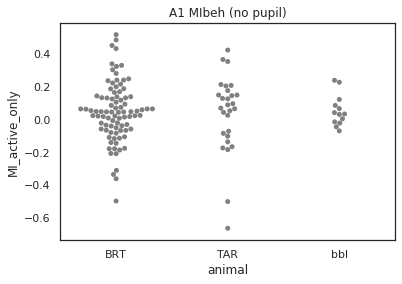

In [118]:
ax = sns.swarmplot(x='animal', y='MI_active_only', data=d307_MI_beh_only, color='grey')
ax.set_title('A1 MIbeh (no pupil)')
plt.savefig('A1_MIbeh_nopupil_per_animal.pdf')

## Plot MIbeh unique per animal

In [119]:
# A1
d307_MI_beh_unique['animal'] = animal307

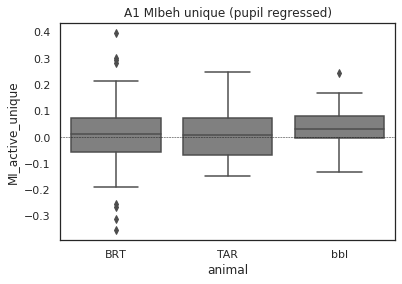

In [120]:
ax = sns.boxplot(x='animal', y='MI_active_unique', data=d307_MI_beh_unique, color='grey')
ax.set_title('A1 MIbeh unique (pupil regressed)')
plt.axhline(color='k', linestyle='--', linewidth=0.5)
plt.savefig('A1_MIbeh_unique_per_animal.pdf')

In [121]:
# IC
animal309 = [s[0:3] for s in d309_MI_beh_only.index]
d309_MI_beh_only['animal'] = animal309

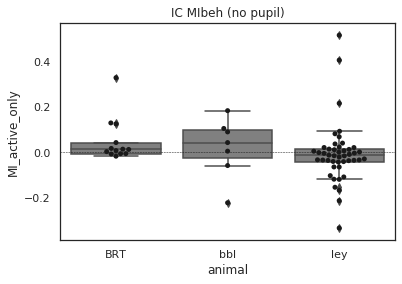

In [122]:
ax = sns.boxplot(x='animal', y='MI_active_only', data=d309_MI_beh_only, color='grey')
ax = sns.swarmplot(x='animal', y='MI_active_only', data=d309_MI_beh_only, color='k')
ax.set_title('IC MIbeh (no pupil)')
plt.axhline(color='k', linestyle='--', linewidth=0.5)
plt.savefig('IC_MIbeh_nopupil_per_animal.pdf')

In [123]:
# IC
d309_MI_beh_unique['animal'] = animal309

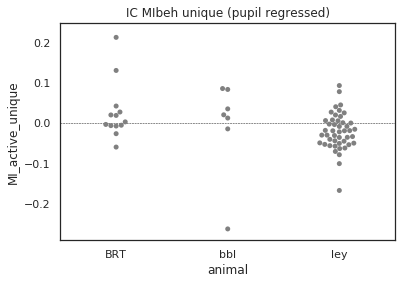

In [124]:
ax = sns.swarmplot(x='animal', y='MI_active_unique', data=d309_MI_beh_unique, color='grey')
ax.set_title('IC MIbeh unique (pupil regressed)')
plt.axhline(color='k', linestyle='--', linewidth=0.5)
plt.savefig('IC_MIbeh_unique_per_animal.pdf')

In [125]:
d309_MI_beh_unique.tail()

state_chan,active,active0,MI_active_unique,animal
cellid,,,,
ley046g-53-1,-0.020189,0.029612,-0.049801,ley
ley046g-57-1,-0.026400,-0.007838,-0.018563,ley
ley046g-59-1,-0.107026,-0.076242,-0.030785,ley
ley049h-a1,0.081902,0.003470,0.078432,ley
ley049h-a2,-0.019503,0.002223,-0.021726,ley


In [126]:
# ley only df for beh unique MI
d309_MI_beh_unique_ley = d309_MI_beh_unique[d309_MI_beh_unique['animal']=='ley']
d309_MI_beh_unique_ley.head()

state_chan,active,active0,MI_active_unique,animal
cellid,,,,
ley011c-a1,0.035204,0.027238,0.007967,ley
ley026g-a1,0.021289,-0.006185,0.027474,ley
ley027f-a1,-0.004835,0.010399,-0.015235,ley
ley027g-a1,-0.064119,-0.045142,-0.018977,ley
ley027g-a2,-0.036001,-0.033603,-0.002398,ley


In [127]:
# ley only df for beh only MI
d309_MI_beh_only_ley = d309_MI_beh_only[d309_MI_beh_only['animal']=='ley']
d309_MI_beh_only_ley.describe()

state_chan,active,active0,MI_active_only
count,46.000000,46.000000,46.000000
mean,-0.006932,0.000025,-0.006956
std,0.132528,0.001489,0.132032
min,-0.336874,-0.003066,-0.333983
25%,-0.040426,-0.000299,-0.040964
50%,-0.013762,-0.000044,-0.013952
75%,0.012535,0.000471,0.013734
max,0.518089,0.005347,0.516592


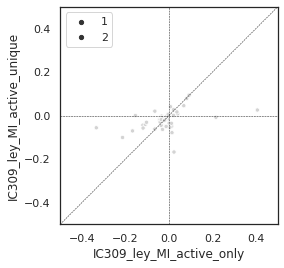

In [128]:
scatter_states_margin_2(df1=d309_MI_beh_only_ley, df2=d309_MI_beh_unique_ley, margin=True, column1='MI_active_only', 
                        column2='MI_active_unique', color='lightgrey', brain_region='IC309_ley', bins=np.arange(-0.5, 0.5, 0.05), 
                       xlim=(-0.5,0.5), ylim=(-0.5,0.5))

# Comparing Sean's data with mine – IC no pupil

In [129]:
# IC SU 305 DS' data 
d_305 = pd.read_csv('d_305_IC_new.csv') # run with stategain model on October 31st
d_305 = d_305.drop(['Unnamed: 0'], axis=1)

FileNotFoundError: [Errno 2] File b'd_305_IC_new.csv' does not exist: b'd_305_IC_new.csv'

In [ ]:
d_305.head()

In [ ]:
# IC SU 305 Sean's data 
d_295 = pd.read_csv('d_295_IC_old.csv')
d_295 = d_295.drop(['Unnamed: 0'], axis=1)

In [ ]:
# concat dataframes
dataframes=[d_305, d_295]
d_IC_all = pd.concat(dataframes)

In [ ]:
d_IC_all.loc[d_IC_all['cellid']=='BRT016f-a1']

In [ ]:
# isolate only rows with "ACTIVE_1" state_chan
_d = d_IC_all[d_IC_all["state_chan"]=="ACTIVE_1"]
_d = _d[_d["state_sig"]=="st.fil"]
_d['animal'] = _d['cellid'].apply(lambda x: x[:3])
_dmed = _d.set_index(['animal','cellid'])
_dmed.median(level=['animal'])

In [ ]:
# eliminate TTL and hen as we don't have enough data from them and it was collected in different conditions
_d = _d[~(_d['animal']=='TTL') & ~(_d['animal']=='hen')]

In [ ]:
ax = sns.boxplot(x='animal', y='g', data=_d)
ax = sns.swarmplot(x='animal', y='g', data=_d, color='black')
#ax.set(ylim=(-1, 1))
plt.axhline(color='k', linestyle='--', linewidth=0.5)
plt.ylabel('g_ACT1')
plt.savefig('IC_g_per_animal_SVD.pdf')

In [ ]:
ax = sns.boxplot(x='animal', y='MI', data=_d)
ax = sns.swarmplot(x='animal', y='MI', data=_d, color='black')
#ax.set(ylim=(-1, 1))
plt.axhline(color='k', linestyle='--', linewidth=0.5)
plt.ylabel('MI_ACT1')
plt.savefig('IC_MI_per_animal_SVD.pdf')

In [ ]:
# IC SU 305 DS' data + 295 sean's data behavior A/P
d_IC_AP = pd.read_csv('d_IC_AP.csv')
d_IC_AP = d_IC_AP.drop(['Unnamed: 0'], axis=1)
d_IC_AP.head(20)

In [ ]:
# isolate active state_chan
_dAP = d_IC_AP[d_IC_AP["state_chan"]=="active"]
_dAP['animal'] = _dAP['cellid'].apply(lambda x: x[:3])
_dAP0 = _dAP[_dAP["state_sig"]=="st.beh0"]
_dAP = _dAP[_dAP["state_sig"]=="st.beh"]
_dAP0_med = _dAP0.set_index(['animal','cellid'])
_dAP_med = _dAP.set_index(['animal','cellid'])
#_dAP['sig'] = (_dAP['r']-_d0['r']) > (_dAP['r_se'] + _dAP0['r_se'])
#_dAP[_dAP['sig']].median(level=['animal'])

In [ ]:
# eliminate TTL and hen as we don't have enough data from them and it was collected in different conditions
_dAP = _dAP[~(_dAP['animal']=='TTL') & ~(_dAP['animal']=='hen')]

In [ ]:
ax = sns.boxplot(x='animal', y='g', data=_dAP)
ax = sns.swarmplot(x='animal', y='g', data=_dAP, color='black')
#ax.set(ylim=(-1, 1))
plt.axhline(color='k', linestyle='--', linewidth=0.5)
plt.ylabel('g_AP')
plt.savefig('IC_g_per_animal_SVD.pdf')

In [ ]:
ax = sns.boxplot(x='animal', y='d', data=_dAP)
ax = sns.swarmplot(x='animal', y='d', data=_dAP, color='black')
#ax.set(ylim=(-1, 1))
plt.axhline(color='k', linestyle='--', linewidth=0.5)
plt.ylabel('d_AP')
plt.savefig('IC_d_per_animal_SVD.pdf')

In [ ]:
ax = sns.boxplot(x='animal', y='MI', data=_dAP)
ax = sns.swarmplot(x='animal', y='MI', data=_dAP, color='black')
#ax.set(ylim=(-1, 1))
plt.axhline(color='k', linestyle='--', linewidth=0.5)
plt.ylabel('MI_AP')
plt.savefig('IC_MI_per_animal_SVD.pdf')